---
# <div align="center">0. Import Library</div>  
---  

In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
pd.set_option('display.max_columns', None)               # Hi·ªÉn th·ªã ƒë·∫ßy ƒë·ªß b·∫£ng v·ªõi thanh tr∆∞·ª£t ngang
pd.set_option('display.float_format', '{:,.2f}'.format)  # L√†m tr√≤n s·ªë hi·ªÉn th·ªã ·ªü d·∫°ng 2 th·∫≠p ph√¢n cho g·ªçn
pd.set_option('future.no_silent_downcasting', True)   

---
# <div align="center">1. Data Preprocessing</div>  
---  

In [141]:
# Excel g·ªëc b·ªã tr·ªëng d√≤ng ƒë·∫ßu ti√™n, l·∫•y d√≤ng 2 v√† 3 l√†m header
data_raw = pd.read_excel(r"C:\Users\ta an\Desktop\Fox_AI\KPI_for_Bank_FoxAI\KPI 2024.xlsx", header=[1,2])
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   (Unnamed: 0_level_0, Th√°ng)                           14074 non-null  float64       
 1   (Unnamed: 1_level_0, CIF CBNV)                        14074 non-null  object        
 2   (Unnamed: 2_level_0, H·ªç - T√™n CBNV)                   14074 non-null  object        
 3   (Unnamed: 3_level_0, M√£ ƒêVKD)                         14074 non-null  int64         
 4   (Unnamed: 4_level_0, Khu v·ª±c)                         14074 non-null  object        
 5   (Unnamed: 5_level_0, T√™n ƒë∆°n v·ªã)                      14074 non-null  object        
 6   (Unnamed: 6_level_0, Ch·ª©c danh)                       14074 non-null  object        
 7   (Unnamed: 7_level_0, M√£ ch·ª©c danh)                    1407

In [142]:
# T·∫°o c·ªôt m·ªõi bao g·ªìm c√°c header mu·ªën thay - d·∫°ng list (ƒê·ªëi chi·∫øu v·ªõi file excel cho d·ªÖ nh√¨n)
new_header = ['Th√°ng', 'CIF CBNV', 'H·ªç T√™n', 
              'M√£ ƒêVKD', 'Khu v·ª±c', 'ƒê∆°n v·ªã', 'Ch·ª©c danh', 'M√£ ch·ª©c danh',     
              'Ng√†y v√†o l√†m vi·ªác', 'Gi·ªõi t√≠nh', 'NƒÉm sinh',                   
              'Book Huy ƒë·ªông', 'Book Cho vay', 'Net Huy ƒë·ªông', 'Net Cho vay',
              'ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',
              'ƒêi·ªÉm Net Hƒê', 'ƒêi·ªÉm Net CV', 
              'SL KH',
              'KPI_CN Book Value', 'KPI_CN Net Value', 'KPI_CN ƒêi·ªÉm DV', 'KPI_CN CLTD/DV',
              'KPI_BP Book Value', 'KPI_BP Net Value', 'KPI_BP ƒêi·ªÉm DV', 'KPI_BP CLTD/DV',
              'T·ªïng ƒëi·ªÉm CN', 'T·ªïng ƒëi·ªÉm BP', 
              'ƒêi·ªÉm KH CN', 'ƒêi·ªÉm KH BP', 
              'T·ª∑ tr·ªçng KPI_CN', 'T·ª∑ tr·ªçng KPI_BP',
              'ƒêi·ªÉm C·ªông/Tr·ª´ CN', 
              '% KPI_CN', '% KPI_BP', '% KPI cu·ªëi c√πng', 
              'Thu nh·∫≠p Gross'
             ]

# Ghi ƒë√® c·ªôt Header m·ªõi ƒë·ªß 41 bi·∫øn thay cho Header 1 v√† 2 MultiIndex, t·∫°o th√†nh dataframe 
data_raw.columns = new_header

# ƒê·ªïi t√™n ƒë·ªÉ l∆∞u tr·ªØ
df_renamed = data_raw

# Ki·ªÉm tra 
display(df_renamed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Th√°ng                          14074 non-null  float64       
 1   CIF CBNV                       14074 non-null  object        
 2   H·ªç T√™n                         14074 non-null  object        
 3   M√£ ƒêVKD                        14074 non-null  int64         
 4   Khu v·ª±c                        14074 non-null  object        
 5   ƒê∆°n v·ªã                         14074 non-null  object        
 6   Ch·ª©c danh                      14074 non-null  object        
 7   M√£ ch·ª©c danh                   14074 non-null  object        
 8   Ng√†y v√†o l√†m vi·ªác              14074 non-null  datetime64[ns]
 9   Gi·ªõi t√≠nh                      14074 non-null  object        
 10  NƒÉm sinh                       14074 non-null  int64    

None

In [143]:
# 0. Th√°ng                          Th·ªùi ƒëi·ªÉm d√≤ng d·ªØ li·ªáu ƒë∆∞·ª£c ghi nh·∫≠n v√†o h·ªá th·ªëng 
# 1. CIF CBNV                       M√£ ID ƒë·ªôc l·∫≠p cho t·ª´ng ng∆∞·ªùi, d√πng ƒë·ªÉ truy v·∫•n n·∫øu c·∫ßn
# 2. H·ªç T√™n
# 3. M√£ ƒêVKD             
# 4. Khu v·ª±c             
# 5. ƒê∆°n v·ªã             
# 6. Ch·ª©c danh           
# 7. M√£ ch·ª©c danh
# 8. Ng√†y v√†o l√†m vi·ªác
# 9. Gi·ªõi t√≠nh
# 10. NƒÉm sinh
# 11. Book Huy ƒê·ªông                 T·ªïng s·ªë ti·ªÅn huy ƒë·ªông ƒë∆∞·ª£c t·ª´ kh√°ch h√†ng     (ti·ªÅn g·ª≠i, ti·∫øt ki·ªám, ƒë·∫ßu t∆∞)       >> Hi·ªáu su·∫•t Thu h√∫t v·ªën
# 12. Book Cho Vay                  T·ªïng s·ªë ti·ªÅn ƒë√£ gi·∫£i ng√¢n cho kh√°ch h√†ng vay                                     >> Hi·ªáu su·∫•t Cho vay
# 13. Net Huy ƒê·ªông V·ªën              = Book Huy ƒê·ªông V·ªën - S·ªë ti·ªÅn kh√°ch r√∫t ra   (M·ª©c tƒÉng tr∆∞·ªüng c·ªßa HƒêV)           >> Hi·ªáu su·∫•t thu h√∫t ti·ªÅn g·ª´i
# 14. Net Cho Vay                   = Book Cho Vay - S·ªë ti·ªÅn kh√°ch tr·∫£ n·ª£        (M·ª©c tƒÉng tr∆∞·ªüng c·ªßa D∆∞ n·ª£ cho vay) >> Hi·ªáu su·∫•t t√≠n d·ª•ng
# 15. ƒêi·ªÉm¬†Book¬†T·ªïng Hƒê¬†ch∆∞a¬†ch·∫∑n   = f0(Book¬†Hƒê k·ª≥ h·∫°n, Hƒê CASA, Hƒê kh√°c...)    (C√°ch t√≠nh t√πy theo ng√¢n h√†ng, h√†m ƒë√£ b·ªã ·∫©n ƒëi
# 16. ƒêi·ªÉm¬†Book¬†Hƒê k·ª≥ h·∫°n¬†ch∆∞a¬†ch·∫∑n = f1(Book Hƒê k·ª≥ h·∫°n)                          C√°ch t√≠nh t∆∞∆°ng t·ª±, ch·ªâ kh√°c h√†m: chia m·ª©c chu·∫©n, nh√¢n h·ªá s·ªë,....) 
# 17. ƒêi·ªÉm¬†Book¬†Hƒê¬†CASA¬†ch∆∞a¬†ch·∫∑n   = f2(Book Hƒê CASA)                                         
# 18. ƒêi·ªÉm¬†Book¬†CV¬†ch∆∞a¬†ch·∫∑n        = f3(Book¬†CV)
# 19. ƒêi·ªÉm Net Hƒê                   = f4(Net Hƒê)
# 20. ƒêi·ªÉm Net CV                   = f5(Net CV)
# 21. SL KH
# 22. KPI_CN Book Value             = g0(Book Hƒê, Book CV)                        V·∫´n t∆∞∆°ng t·ª±, h√†m ƒë√£ b·ªã ·∫©n ƒëi:
# 23. KPI_CN Net Value              = g1(Net Hƒê, Net Value)                                     Th√™m ch·∫∑n, thay tr·ªçng s·ªë,... 
# 24. KPI_CN ƒêi·ªÉm DV                ƒêi·ªÉm D∆∞ V·ªën /// ƒêi·ªÉm D·ªãch v·ª• ???????????                                   
# 25. KPI_CN CLTD/DV                Cho L√£i T√≠n D·ª•ng / DV
# 26. KPI_BP Book Value                                                           V·∫´n t∆∞∆°ng t·ª±, h√†m kh√°c n·ªØa b·ªã ·∫©n ƒëi:
# 27. KPI_BP Net Value                                                                          Chia cho t·ªïng n√†o ƒë√≥ c·ªßa b·ªô ph·∫≠n, thay tr·ªçng s·ªë,...    
# 28. KPI_BP ƒêi·ªÉm DV                
# 29. KPI_BP CLTD/DV                       
# 30. T·ªïng ƒëi·ªÉm CN                  = SUM(22 23 24 25)
# 31. T·ªïng ƒëi·ªÉm BP                  = SUM(26 27 28 29)      
# 32. ƒêi·ªÉm KH CN                    ƒêi·ªÉm K·∫ø ho·∫°ch C√° nh√¢n
# 33. ƒêi·ªÉm KH BP                    ƒêi·ªÉm K·∫ø ho·∫°ch B·ªô ph·∫≠n
# 34. T·ª∑ tr·ªçng KPI_CN                    T·ª∑ tr·ªçng c·ªôt 34 35 ƒë·ªÉ nh√¢n v·ªõi c·ªôt 37 38 ra c·ªôt 39        
# 35. T·ª∑ tr·ªçng KPI_BP                    V√≠ d·ª•: GDV t·ª∑ tr·ªçng 1 - 0; C√†ng c·∫•p cao nh∆∞ Gƒê, KSV th√¨ t·ª∑ tr·ªçng 0.2 - 0.8 (ch√≠nh s√°ch ng√¢n h√†ng t√πy th√°ng)
# 36. ƒêi·ªÉm C·ªông/Tr·ª´ CN              C·ªông v√†o c·ªôt 30 ???
# 37. % KPI_CN                      = 30 / 32
# 38. % KPI_BP                      = 31 / 33 
# 39. % KPI cu·ªëi c√πng               = 30 * 37 + 35 * 38
# 40. Thu nh·∫≠p Gross                Thu nh·∫≠p tr∆∞·ªõc khi tr·ª´ ƒëi c√°c kho·∫£n chi ph√≠, thu·∫ø, b·∫£o hi·ªÉm, v.v kh√°c

In [144]:
# T·∫°o b·∫£n sao dataframe g·ªçn, tr√°nh ghi ƒë√®
df = df_renamed.copy()

# X√≥a
df.drop(columns=['CIF CBNV', 'H·ªç T√™n'], inplace=True)
df.drop(columns=['Khu v·ª±c'], inplace=True)

# Xem s·ªë Bi·∫øn ƒë·ªôc l·∫≠p k·∫øt h·ª£p v·ªõi FILTER Excel
unique_counts = df_renamed[['M√£ ƒêVKD', 'Khu v·ª±c', 'ƒê∆°n v·ªã', 'Ch·ª©c danh', 'M√£ ch·ª©c danh']].nunique()
display(unique_counts)

# X√≥a
df.drop(columns=['ƒê∆°n v·ªã', 'Ch·ª©c danh'], inplace=True)

M√£ ƒêVKD         134
Khu v·ª±c           8
ƒê∆°n v·ªã          270
Ch·ª©c danh        41
M√£ ch·ª©c danh      6
dtype: int64

In [145]:
# T√°ch nƒÉm v√† th√°ng t·ª´ c√°c bi·∫øn c≈©
year_recorded = df['Th√°ng'].astype(int)
month_recorded = ((df['Th√°ng'] - year_recorded) * 100).round().astype(int)
year_joined = df['Ng√†y v√†o l√†m vi·ªác'].dt.year
month_joined = df['Ng√†y v√†o l√†m vi·ªác'].dt.month

# T√≠nh 'S·ªë nƒÉm ƒë√£ l√†m', v·ªõi ph·∫ßn th·∫≠p ph√¢n bi·ªÉu th·ªã s·ªë th√°ng
years_worked = (year_recorded - year_joined) + (month_recorded - month_joined) / 12

# Th√™m v√†o dataframe ·ªü ƒë√∫ng v·ªã tr√≠ index mong mu·ªën
df.insert(3, 'S·ªë nƒÉm ƒë√£ l√†m', years_worked)

# Nh·ªØng tr∆∞·ªùng h·ª£p <0 coi nh∆∞ = 0
df['S·ªë nƒÉm ƒë√£ l√†m'] = df['S·ªë nƒÉm ƒë√£ l√†m'].apply(lambda x: max(x, 0))

# Ki·ªÉm tra
display(df[['Th√°ng', 'Ng√†y v√†o l√†m vi·ªác', 'S·ªë nƒÉm ƒë√£ l√†m']].head())

# X√≥a c√°c bi·∫øn c≈©
df.drop(columns=['Th√°ng', 'Ng√†y v√†o l√†m vi·ªác'], inplace=True)

Th√°ng Ng√†y v√†o l√†m vi·ªác  S·ªë nƒÉm ƒë√£ l√†m
0 2,024.04        2008-06-17          15.83
1 2,024.04        2010-12-15          13.33
2 2,024.04        2008-02-01          16.17
3 2,024.04        2010-08-11          13.67
4 2,024.04        2008-09-04          15.58

In [146]:
# Trong qu√° tr√¨nh l√†m, ph√°t hi·ªán duy nh·∫•t 2 quan s√°t b·ªã sai nƒÉm sinh 2002 th√†nh 2022 khi·∫øn Tu·ªïi = 3
df.loc[df['NƒÉm sinh'] == 2022, 'NƒÉm sinh'] = 2002  # S·ª≠a l·ªói nh·∫≠p li·ªáu

# T√≠nh 'Tu·ªïi'
age = 2025 - df['NƒÉm sinh']

# Th√™m v√†o dataframe ·ªü ƒë√∫ng v·ªã tr√≠ index mong mu·ªën
df.insert(4, 'Tu·ªïi', age)

# Ki·ªÉm tra
display(df[['NƒÉm sinh', 'Tu·ªïi']].head())

# X√≥a c·ªôt 'NƒÉm sinh' sau khi ƒë√£ t√≠nh tu·ªïi
df.drop(columns=['NƒÉm sinh'], inplace=True)

NƒÉm sinh  Tu·ªïi
0      1983    42
1      1988    37
2      1977    48
3      1986    39
4      1982    43

In [147]:
df

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi      Book Huy ƒë·ªông  \
0           25     CQL DVKH          15.83        N·ªØ    42  68,382,348,762.00   
1           22     CQL DVKH          13.33        N·ªØ    37  68,382,348,762.00   
2           27     CQL DVKH          16.17       Nam    48  48,507,770,815.00   
3           63     CQL DVKH          13.67        N·ªØ    39 190,979,972,081.00   
4           31     CQL DVKH          15.58        N·ªØ    43  56,215,318,133.00   
...        ...          ...            ...       ...   ...                ...   
14069        7     CQL QHKH           0.00       Nam    38               0.00   
14070        7         QLKH           0.00       Nam    27               0.00   
14071      138         QLKH           0.00        N·ªØ    24               0.00   
14072      127         QLKH           0.00       Nam    26               0.00   
14073       44         QLKH          16.25        N·ªØ    44   8,473,506,868.00   

        Book Cho vay      Net Huy ƒë·ªông     Net Cho vay  \
0     853,800,000.00  3,127,777,986.33 -385,670,000.00   
1     853,800,000.00  3,127,777,986.33 -385,670,000.00   
2       3,221,763.90 39,407,406,889.80      220,561.35   
3      58,500,584.40    624,766,772.27  244,910,229.69   
4     390,000,000.00  1,898,063,539.63   46,200,000.00   
...              ...               ...             ...   
14069           0.00              0.00            0.00   
14070           0.00              0.00            0.00   
14071           0.00              0.00            0.00   
14072           0.00              0.00            0.00   
14073  51,565,009.20    112,859,690.06   -4,520,572.50   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
0                            56.20                          55.08   
1                            56.20                          55.08   
2                            39.87                          39.07   
3                           156.97                         153.83   
4                            46.20                          45.28   
...                            ...                            ...   
14069                         0.00                           0.00   
14070                         0.00                           0.00   
14071                         0.00                           0.00   
14072                         0.00                           0.00   
14073                         7.41                           7.26   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
0                             1.12                    1.75         2.57   
1                             1.12                    1.75         2.57   
2                             0.80                    0.01        31.77   
3                             3.14                    0.12         0.51   
4                             0.92                    0.80         1.56   
...                            ...                     ...          ...   
14069                         0.00                    0.00         0.00   
14070                         0.00                    0.00         0.00   
14071                         0.00                    0.00         0.00   
14072                         0.00                    0.00         0.00   
14073                         0.15                    0.11         0.13   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
0            -0.79     20              29.04              0.64   
1            -0.79    548              57.95              1.77   
2             0.00     55              39.88             31.77   
3             0.50    105             157.09              1.02   
4             0.09     86              47.00              1.65   
...            ...    ...                ...               ...   
14069         0.00      0               0.00              0.00   
14070

---
# <div align="center">2. Divide dataframe according roles</div>  
---  

In [148]:
# DataFrame nh√¢n vi√™n (nv): KPI_CN = 1, KPI_BP = 0
dataframe_nv = df[(df['T·ª∑ tr·ªçng KPI_CN'] == 1.0) & (df['T·ª∑ tr·ªçng KPI_BP'] == 0.0)]
dataframe_nv = dataframe_nv.copy()

# DataFrame qu·∫£n l√Ω (ql): KPI_CN = 0.6, KPI_BP = 0.4
dataframe_ql = df[(df['T·ª∑ tr·ªçng KPI_CN'] == 0.6) & (df['T·ª∑ tr·ªçng KPI_BP'] == 0.4)]
dataframe_ql = dataframe_ql.copy()

# DataFrame l√£nh ƒë·∫°o (ld): KPI_CN = 0.2, KPI_BP = 0.8
dataframe_ld = df[(df['T·ª∑ tr·ªçng KPI_CN'] == 0.2) & (df['T·ª∑ tr·ªçng KPI_BP'] == 0.8)]
dataframe_ld = dataframe_ld.copy()

---
# <div align="center">3. Employee Dataframe</div>  
---  

# ** Dataframe_nv confusion matrix

In [149]:
dataframe_nv

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi     Book Huy ƒë·ªông  \
26          73          GDV           0.83        N·ªØ    35 16,717,578,022.00   
27          73          GDV           0.83        N·ªØ    27 16,387,470,376.00   
28           8          GDV           1.50        N·ªØ    25 47,602,167,040.00   
29           8          GDV           1.17        N·ªØ    26 13,515,104,731.47   
30           8          GDV           1.08        N·ªØ    28 13,799,345,850.00   
...        ...          ...            ...       ...   ...               ...   
14067       27         QLKH           0.00        N·ªØ    35              0.00   
14070        7         QLKH           0.00       Nam    27              0.00   
14071      138         QLKH           0.00        N·ªØ    24              0.00   
14072      127         QLKH           0.00       Nam    26              0.00   
14073       44         QLKH          16.25        N·ªØ    44  8,473,506,868.00   

        Book Cho vay      Net Huy ƒë·ªông    Net Cho vay  \
26    244,503,887.70     95,054,078.80     249,622.41   
27    373,698,618.00 -1,227,723,201.93   1,239,023.30   
28    669,495,807.30    585,632,659.93 -88,476,816.41   
29      5,729,358.90    866,064,389.83  52,101,849.02   
30      6,000,000.00    505,271,591.73           0.00   
...              ...               ...            ...   
14067           0.00              0.00           0.00   
14070           0.00              0.00           0.00   
14071           0.00              0.00           0.00   
14072           0.00              0.00           0.00   
14073  51,565,009.20    112,859,690.06  -4,520,572.50   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
26                           13.74                          13.47   
27                           13.47                          13.20   
28                           39.13                          38.35   
29                           11.11                          10.89   
30                           11.34                          11.11   
...                            ...                            ...   
14067                         0.00                           0.00   
14070                         0.00                           0.00   
14071                         0.00                           0.00   
14072                         0.00                           0.00   
14073                         7.41                           7.26   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
26                            0.27                    0.50         0.08   
27                            0.27                    0.77        -1.01   
28                            0.78                    1.38         0.48   
29                            0.22                    0.01         0.71   
30                            0.23                    0.01         0.42   
...                            ...                     ...          ...   
14067                         0.00                    0.00         0.00   
14070                         0.00                    0.00         0.00   
14071                         0.00                    0.00         0.00   
14072                         0.00                    0.00         0.00   
14073                         0.15                    0.11         0.13   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
26            0.00    401              14.24              0.08   
27            0.00    368              14.24             -1.01   
28           -0.18    821              40.51              0.30   
29            0.11    206              11.12              0.82   
30            0.00    361              11.35              0.42   
...            ...    ...                ...               ...   
14067         0.00      0               0.00              0.00   
14070         0.00      0

# Delete rows with non-salary

In [150]:
dataframe_nv = dataframe_nv.dropna(subset=['Thu nh·∫≠p Gross'])
dataframe_nv

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi     Book Huy ƒë·ªông  \
26          73          GDV           0.83        N·ªØ    35 16,717,578,022.00   
27          73          GDV           0.83        N·ªØ    27 16,387,470,376.00   
28           8          GDV           1.50        N·ªØ    25 47,602,167,040.00   
29           8          GDV           1.17        N·ªØ    26 13,515,104,731.47   
30           8          GDV           1.08        N·ªØ    28 13,799,345,850.00   
...        ...          ...            ...       ...   ...               ...   
14063       85         QLKH           0.00        N·ªØ    36              0.00   
14064       59         QLKH           0.00       Nam    37              0.00   
14066       30          GDV           0.00        N·ªØ    24              0.00   
14067       27         QLKH           0.00        N·ªØ    35              0.00   
14073       44         QLKH          16.25        N·ªØ    44  8,473,506,868.00   

        Book Cho vay      Net Huy ƒë·ªông    Net Cho vay  \
26    244,503,887.70     95,054,078.80     249,622.41   
27    373,698,618.00 -1,227,723,201.93   1,239,023.30   
28    669,495,807.30    585,632,659.93 -88,476,816.41   
29      5,729,358.90    866,064,389.83  52,101,849.02   
30      6,000,000.00    505,271,591.73           0.00   
...              ...               ...            ...   
14063           0.00        899,338.74           0.00   
14064           0.00              0.00           0.00   
14066           0.00              0.00           0.00   
14067           0.00              0.00           0.00   
14073  51,565,009.20    112,859,690.06  -4,520,572.50   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
26                           13.74                          13.47   
27                           13.47                          13.20   
28                           39.13                          38.35   
29                           11.11                          10.89   
30                           11.34                          11.11   
...                            ...                            ...   
14063                         0.00                           0.00   
14064                         0.00                           0.00   
14066                         0.00                           0.00   
14067                         0.00                           0.00   
14073                         7.41                           7.26   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
26                            0.27                    0.50         0.08   
27                            0.27                    0.77        -1.01   
28                            0.78                    1.38         0.48   
29                            0.22                    0.01         0.71   
30                            0.23                    0.01         0.42   
...                            ...                     ...          ...   
14063                         0.00                    0.00         0.00   
14064                         0.00                    0.00         0.00   
14066                         0.00                    0.00         0.00   
14067                         0.00                    0.00         0.00   
14073                         0.15                    0.11         0.13   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
26            0.00    401              14.24              0.08   
27            0.00    368              14.24             -1.01   
28           -0.18    821              40.51              0.30   
29            0.11    206              11.12              0.82   
30            0.00    361              11.35              0.42   
...            ...    ...                ...               ...   
14063         0.00      1               0.00              0.00   
14064         0.00     

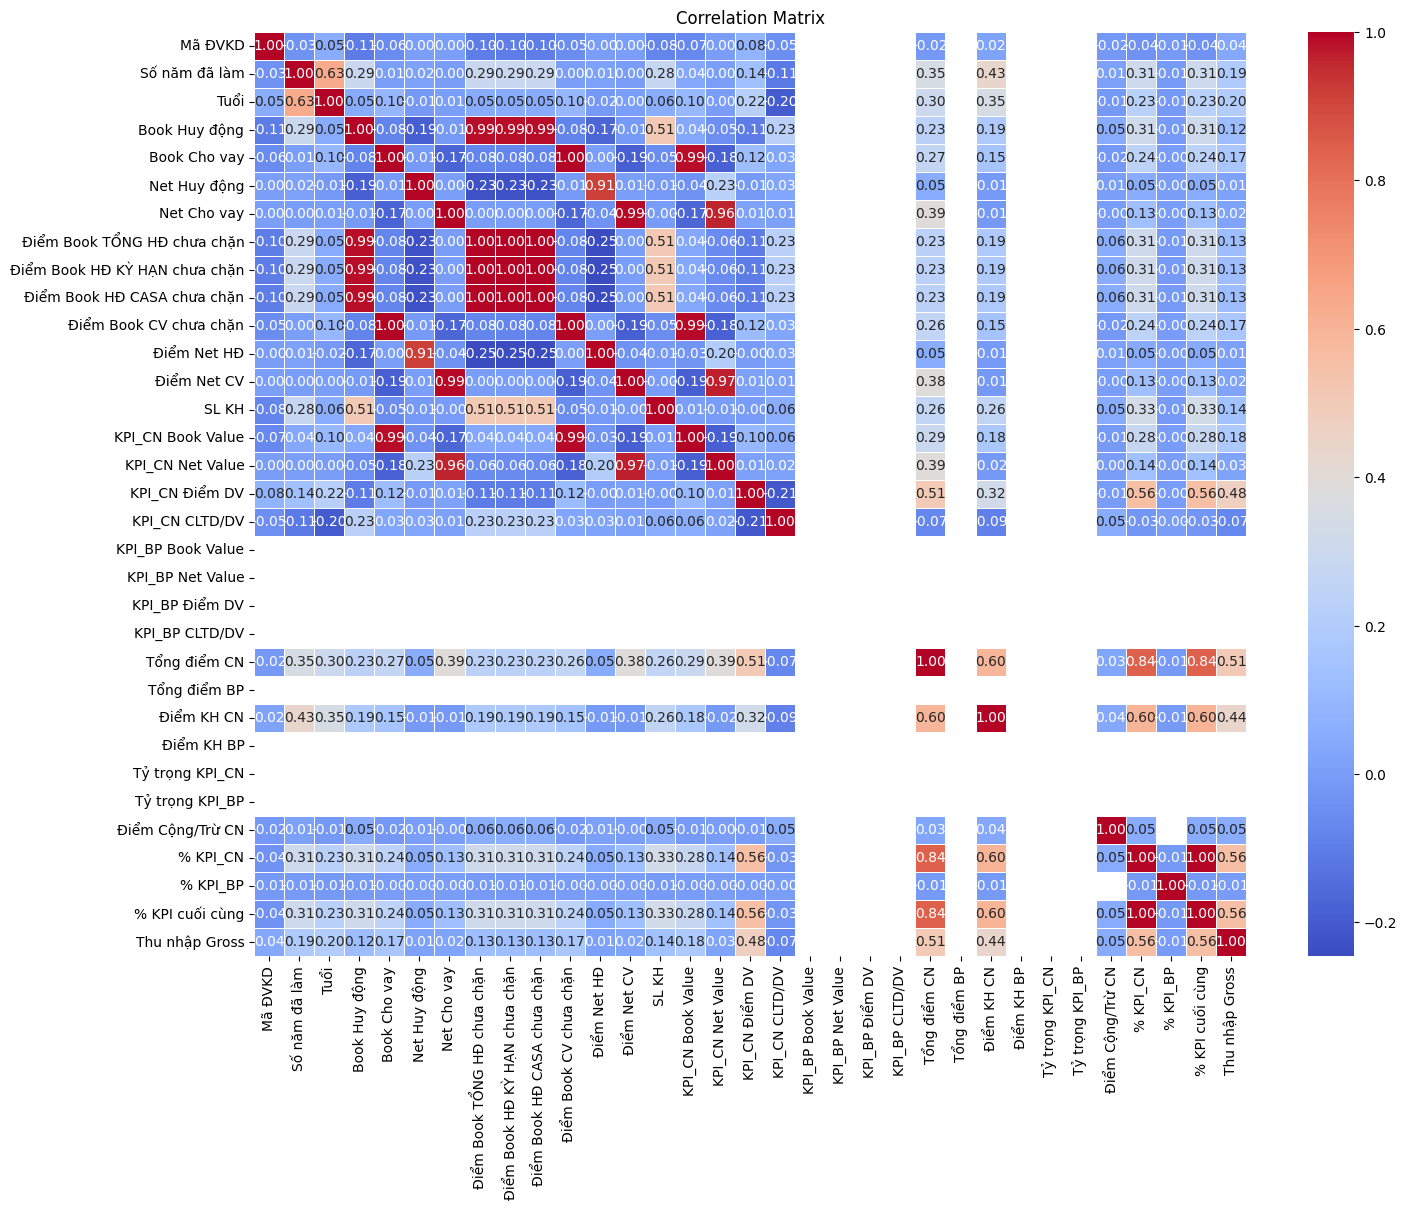

In [151]:
# Ma tr·∫≠n t∆∞∆°ng quan ban ƒë·∫ßu
df_nv = dataframe_nv.select_dtypes(include=[np.number])
corr_matrix = df_nv.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [152]:
# X√≥a c√°c bi·∫øn Kh√¥ng li√™n quan
df_nv.drop(columns=['ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',             
                 'ƒêi·ªÉm Net Hƒê',                         
                 'ƒêi·ªÉm Net CV',                        
                 'KPI_CN Book Value',                   
                 'KPI_CN Net Value',  
                 'T·ª∑ tr·ªçng KPI_BP', 
                 'T·ª∑ tr·ªçng KPI_CN',
                 'KPI_BP Book Value',
                 'KPI_BP Net Value',
                 'KPI_BP ƒêi·ªÉm DV',
                 'KPI_BP CLTD/DV',
                 'ƒêi·ªÉm KH BP',
                 'T·ªïng ƒëi·ªÉm BP',
                 '% KPI_BP', 
                 'M√£ ƒêVKD',
                 'KPI_CN CLTD/DV',
                 'Net Huy ƒë·ªông',
                 'Thu nh·∫≠p Gross',
                 '% KPI_CN'    
                ], inplace=True)



# X√≥a bi·∫øn thi·∫øu √Ω nghƒ©a - kho·∫£ng 90% gi√° tr·ªã = 0
df_nv.drop(columns=['ƒêi·ªÉm C·ªông/Tr·ª´ CN'], inplace=True)

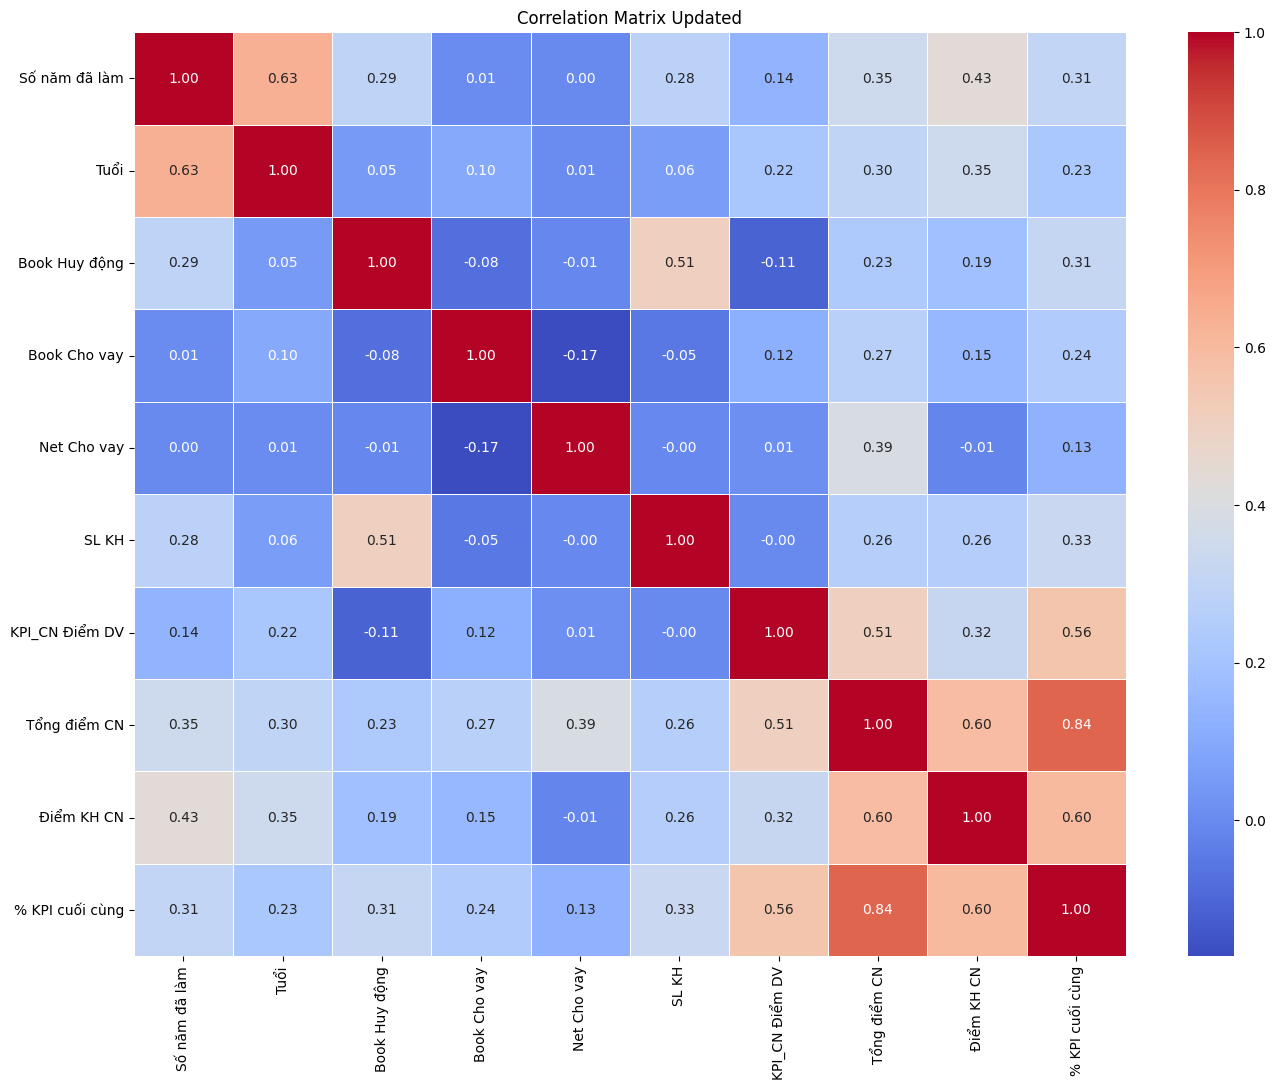

In [153]:
# Ma tr·∫≠n t∆∞∆°ng quan 2
df_numeric_2 = df_nv.select_dtypes(include=[np.number])
corr_matrix_2 = df_numeric_2.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

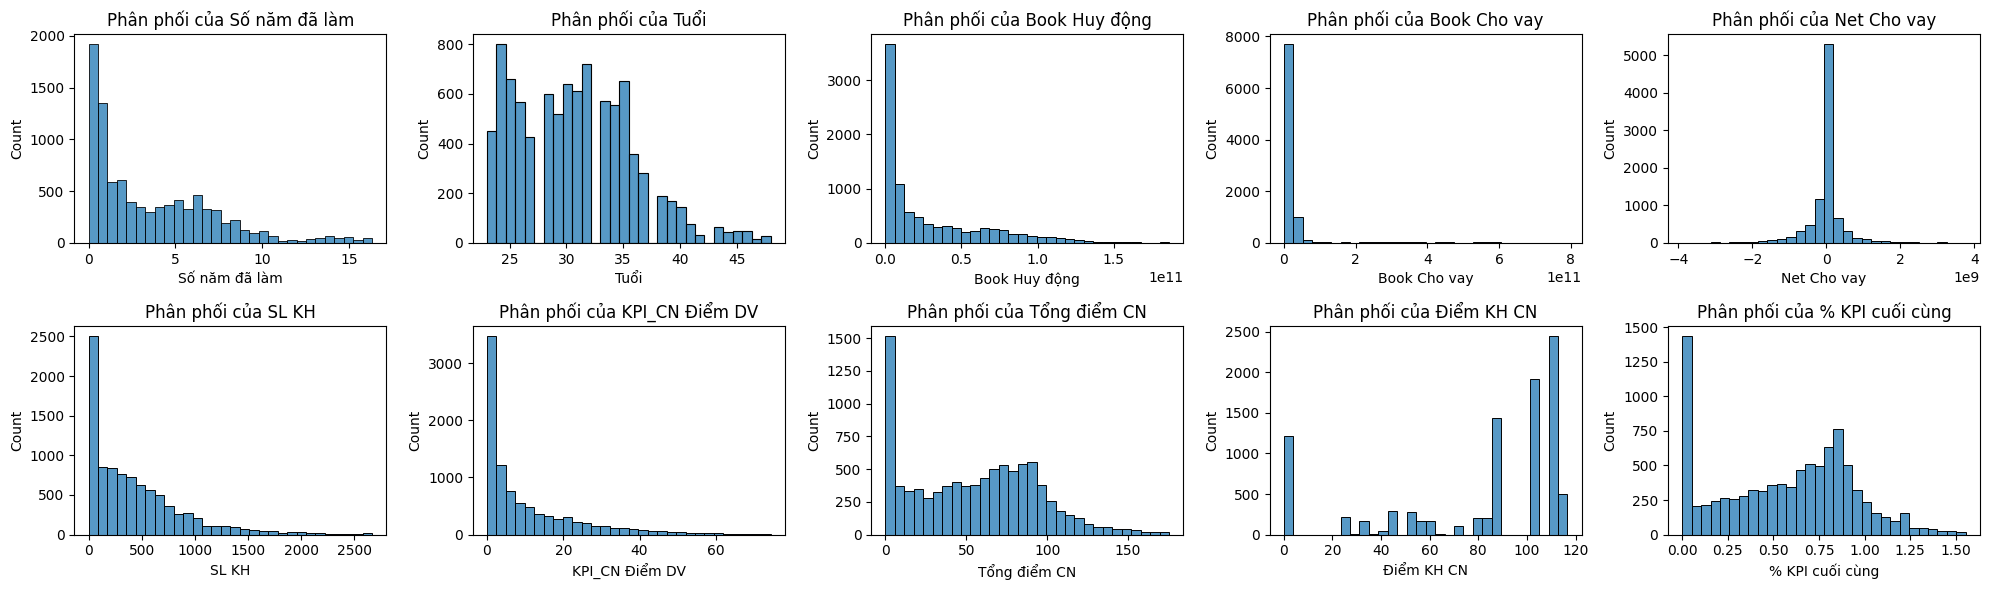

In [154]:
# Ph√¢n ph·ªëi 
numerical_features = df_nv.select_dtypes(include=[np.number]).columns.tolist()
num_features = len(numerical_features)
cols = 5
rows = math.ceil(num_features / cols)
plt.figure(figsize=(cols * 4, rows * 3))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    
    data_plt = df_nv[feature]                           # T·∫°o data_plt c·∫Øt ƒëi ph·∫ßn ngo·∫°i lai tr√™n d∆∞·ªõi cho ƒë·ªì th·ªã m∆∞·ª£t d·ªÖ h√¨nh dung h∆°n
    q_low = data_plt.quantile(0.01)
    q_high = data_plt.quantile(0.99)
    data_plt = data_plt[(data_plt >= q_low) & (data_plt <= q_high)]
    
    sns.histplot(data_plt, bins=30)
    plt.title(f'Ph√¢n ph·ªëi c·ªßa {feature}')
    plt.tight_layout()
plt.show()

# Standardize 3 datasets

# Standardize dataframe_nv


In [155]:
df_nv.tail(50)

S·ªë nƒÉm ƒë√£ l√†m  Tu·ªïi    Book Huy ƒë·ªông      Book Cho vay  \
14009           0.08    35    95,000,003.00              0.00   
14010           0.08    23             0.00              0.00   
14011           0.08    34             0.00              0.00   
14012           0.08    25             0.00              0.00   
14013           0.08    37             0.00              0.00   
14014           0.08    36 8,923,697,183.00  8,376,502,255.20   
14015           0.08    26       999,999.00              0.00   
14016           0.08    27             0.00              0.00   
14017           0.08    39             0.00              0.00   
14018           0.08    32   126,827,243.00 28,095,826,708.70   
14020           7.42    33 3,748,762,472.00    130,445,950.50   
14021           0.42    25 5,011,683,029.00 22,141,439,876.50   
14022           0.33    35             0.00              0.00   
14024           1.17    24 1,100,000,000.00              0.00   
14025           1.17    28   200,345,116.00              0.00   
14026           0.83    23             0.00              0.00   
14029           0.92    24             0.00              0.00   
14030           0.00    35             0.00              0.00   
14031           0.08    23    10,222,339.00              0.00   
14032           0.08    23             0.00              0.00   
14033           0.00    28             0.00              0.00   
14034           0.00    31             0.00              0.00   
14035           0.08    23             0.00              0.00   
14037           0.00    35             0.00              0.00   
14038           0.00    37             0.00              0.00   
14039           0.00    26             0.00              0.00   
14041           0.00    30             0.00              0.00   
14042           0.00    24             0.00              0.00   
14044           0.00    39             0.00              0.00   
14046           0.00    24             0.00              0.00   
14047           0.00    24             0.00              0.00   
14048           0.00    31             0.00              0.00   
14050           0.00    31             0.00              0.00   
14051           0.00    23             0.00              0.00   
14052           0.00    23             0.00              0.00   
14053           0.00    32             0.00              0.00   
14054           0.00    34             0.00              0.00   
14055           0.00    22             0.00              0.00   
14056           0.00    32             0.00              0.00   
14057           0.00    31             0.00              0.00   
14058           0.00    26             0.00              0.00   
14059           0.00    26             0.00              0.00   
14060           0.00    31             0.00              0.00   
14061           0.00    28             0.00              0.00   
14062           0.00    31             0.00              0.00   
14063           0.00    36             0.00              0.00   
14064           0.00    37             0.00              0.00   
14066           0.00    24             0.00              0.00   
14067           0.00    35             0.00              0.00   
14073          16.25    44 8,473,506,868.00     51,565,009.20   

            Net Cho vay  SL KH  KPI_CN ƒêi·ªÉm DV  T·ªïng ƒëi·ªÉm CN  ƒêi·ªÉm KH CN  \
14009              0.00      1            0.20          0.20        0.00   
14010              0.00      0            0.00          0.00        0.00   
14011              0.00      1            0.80          1.36        0.00   
14012              0.00      0            0.00          0.00        0.00   
14013    220,412,903.23      3            0.00          0.70        0.00   
14014   -100,609,947.50    192           11.20          0.00        0.00   
14015              0.00      1            0.00          0.21        0.00   
14016              0.00      0            0.00          0.00 

# Classify the flexibility of Employee

# Divide dataset

In [156]:
# Bi·∫øn x l√† c√°c bi·∫øn ƒë·∫ßu v√†o, y l√† ƒë·∫ßu ra c·∫ßn d·ª± ƒëo√°n
x = df_nv.drop(['% KPI cu·ªëi c√πng'], axis=1)   
y = df_nv['% KPI cu·ªëi c√πng'] 

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42               
)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc t·∫≠p train/test
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (7501, 9)
Test size: (1876, 9)


In [157]:
# Sao ch√©p d·ªØ li·ªáu g·ªëc ƒë·ªÉ x·ª≠ l√Ω ri√™ng
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [158]:
# BI·∫æN ƒê·ªäNH L∆Ø·ª¢NG
numerical_cols = X_train_scaled.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Ki·ªÉm tra
display(X_train_scaled.head(5))
print("")
display(X_train_scaled.describe())

S·ªë nƒÉm ƒë√£ l√†m  Tu·ªïi  Book Huy ƒë·ªông  Book Cho vay  Net Cho vay  SL KH  \
12368          -0.91 -1.40          -0.43         -0.24        -0.00   0.27   
11694          -0.63 -0.86           1.01         -0.24        -0.00   7.11   
7362           -0.78 -0.50          -0.45         -0.09        -0.02  -0.55   
6203           -0.95 -1.22          -0.67         -0.25        -0.00  -0.85   
11648           0.23 -0.33          -0.51          0.03        -0.03  -0.17   

       KPI_CN ƒêi·ªÉm DV  T·ªïng ƒëi·ªÉm CN  ƒêi·ªÉm KH CN  
12368            0.50         -0.50       -1.40  
11694           -0.48          0.39        0.17  
7362             2.18          1.26        0.60  
6203            -0.13         -1.13       -2.07  
11648           -0.68          0.57        0.92

S·ªë nƒÉm ƒë√£ l√†m     Tu·ªïi  Book Huy ƒë·ªông  Book Cho vay  Net Cho vay  \
count       7,501.00 7,501.00       7,501.00      7,501.00     7,501.00   
mean           -0.00    -0.00           0.00          0.00         0.00   
std             1.00     1.00           1.00          1.00         1.00   
min            -0.98    -1.58          -0.67         -0.25       -24.11   
25%            -0.80    -0.86          -0.63         -0.24        -0.01   
50%            -0.35    -0.15          -0.42         -0.24        -0.00   
75%             0.57     0.57           0.38         -0.12        -0.00   
max             6.05     5.43          14.38         16.98        20.13   

         SL KH  KPI_CN ƒêi·ªÉm DV  T·ªïng ƒëi·ªÉm CN  ƒêi·ªÉm KH CN  
count 7,501.00        7,501.00      7,501.00    7,501.00  
mean     -0.00            0.00          0.00        0.00  
std       1.00            1.00          1.00        1.00  
min      -0.85           -1.17         -1.23       -2.07  
25%      -0.71           -0.62         -0.77       -0.63  
50%      -0.27           -0.39          0.00        0.55  
75%       0.33            0.28          0.55        0.81  
max      10.35           27.40         18.64        0.92

# Run the model for dataframe_nv

# Classification model

In [159]:
# B∆∞·ªõc 1: G√°n nh√£n ph√¢n lo·∫°i
def classify_kpi(kpi):
    if kpi < 0.5:
        return 'K√©m'
    elif 0.5 <= kpi < 0.8:
        return 'Trung b√¨nh'
    elif 0.8 <= kpi < 1.0:
        return 'T·ªët'
    elif 1.0 <= kpi <= 1.2:
        return 'R·∫•t T·ªët'
    else:
        return 'Xu·∫•t s·∫Øc'

# G√°n nh√£n cho t·∫≠p train/test
y_train_label = y_train.apply(classify_kpi)
y_test_label = y_test.apply(classify_kpi)

# Encode nh√£n th√†nh s·ªë (ƒë·ªÉ train ƒë∆∞·ª£c m√¥ h√¨nh)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_label)
y_test_encoded = label_encoder.transform(y_test_label)

# Ki·ªÉm tra nh√£n
print("Classes:", label_encoder.classes_)
print("Encoded train labels:", np.unique(y_train_encoded, return_counts=True))


Classes: ['K√©m' 'R·∫•t T·ªët' 'Trung b√¨nh' 'T·ªët' 'Xu·∫•t s·∫Øc']
Encoded train labels: (array([0, 1, 2, 3, 4]), array([3019,  512, 2046, 1631,  293], dtype=int64))



================ Decision Tree ================



‚úÖ Accuracy: 0.9883

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       1.00      1.00      1.00       757
     R·∫•t T·ªët       0.97      0.99      0.98       134
  Trung b√¨nh       0.98      0.99      0.98       512
         T·ªët       0.99      0.97      0.98       417
    Xu·∫•t s·∫Øc       1.00      1.00      1.00        56

    accuracy                           0.99      1876
   macro avg       0.99      0.99      0.99      1876
weighted avg       0.99      0.99      0.99      1876



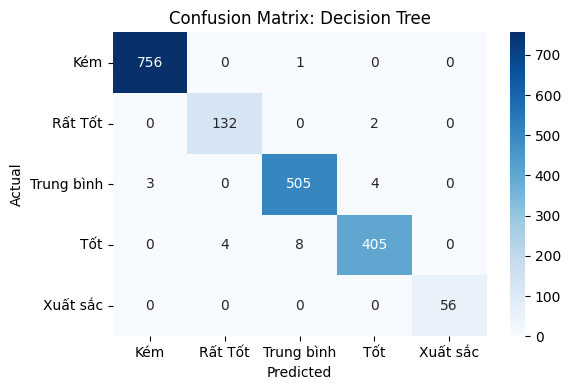


================ Random Forest ================

‚úÖ Accuracy: 0.9771

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.99      1.00      0.99       757
     R·∫•t T·ªët       0.93      0.96      0.94       134
  Trung b√¨nh       0.97      0.97      0.97       512
         T·ªët       0.97      0.95      0.96       417
    Xu·∫•t s·∫Øc       0.98      1.00      0.99        56

    accuracy                           0.98      1876
   macro avg       0.97      0.98      0.97      1876
weighted avg       0.98      0.98      0.98      1876



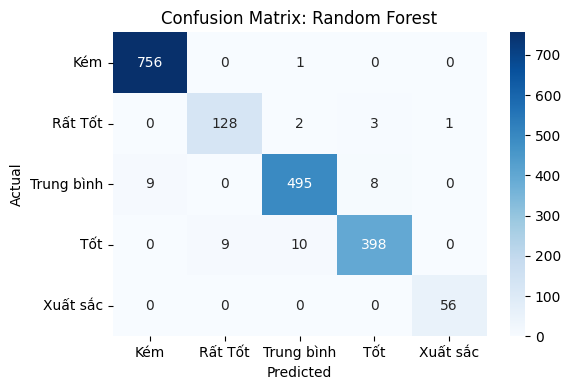


================ KNN ================

‚úÖ Accuracy: 0.8523

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.94      0.95      0.95       757
     R·∫•t T·ªët       0.72      0.54      0.62       134
  Trung b√¨nh       0.81      0.82      0.81       512
         T·ªët       0.79      0.82      0.80       417
    Xu·∫•t s·∫Øc       0.81      0.82      0.81        56

    accuracy                           0.85      1876
   macro avg       0.81      0.79      0.80      1876
weighted avg       0.85      0.85      0.85      1876



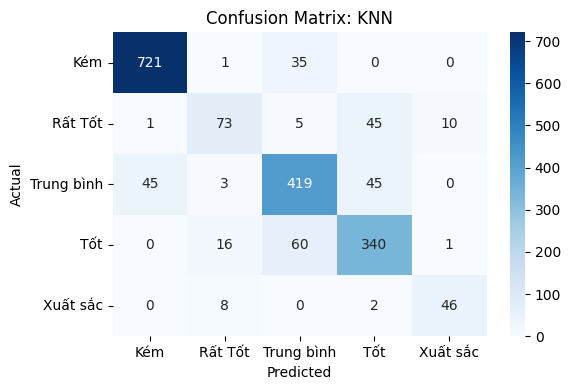


================ SVM ================

‚úÖ Accuracy: 0.9216

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.97      0.98      0.97       757
     R·∫•t T·ªët       0.90      0.67      0.77       134
  Trung b√¨nh       0.92      0.90      0.91       512
         T·ªët       0.85      0.93      0.89       417
    Xu·∫•t s·∫Øc       0.91      0.89      0.90        56

    accuracy                           0.92      1876
   macro avg       0.91      0.87      0.89      1876
weighted avg       0.92      0.92      0.92      1876



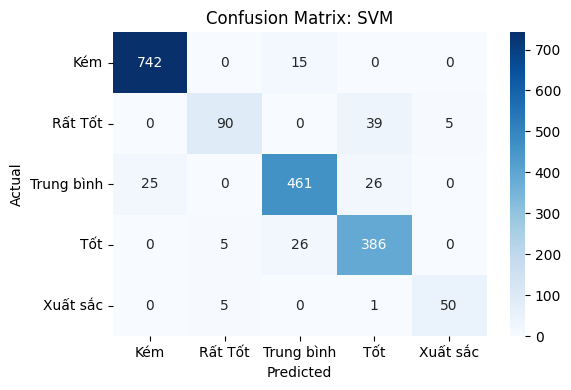


================ Gradient Boosting ================

‚úÖ Accuracy: 0.9792

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.99      1.00      0.99       757
     R·∫•t T·ªët       0.98      0.93      0.95       134
  Trung b√¨nh       0.98      0.97      0.97       512
         T·ªët       0.97      0.97      0.97       417
    Xu·∫•t s·∫Øc       0.98      1.00      0.99        56

    accuracy                           0.98      1876
   macro avg       0.98      0.97      0.98      1876
weighted avg       0.98      0.98      0.98      1876



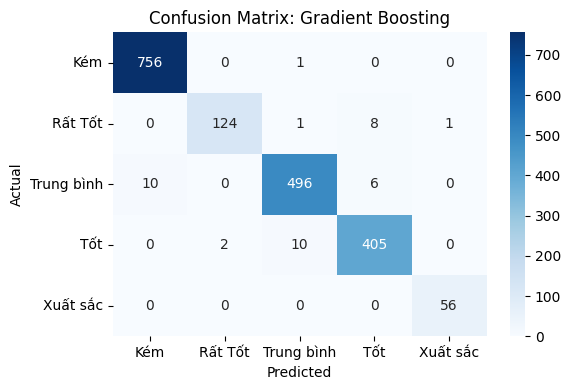


================ Logistic Regression ================

‚úÖ Accuracy: 0.9152

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.95      0.97      0.96       757
     R·∫•t T·ªët       0.85      0.61      0.71       134
  Trung b√¨nh       0.93      0.90      0.92       512
         T·ªët       0.86      0.94      0.89       417
    Xu·∫•t s·∫Øc       0.94      0.84      0.89        56

    accuracy                           0.92      1876
   macro avg       0.90      0.85      0.87      1876
weighted avg       0.91      0.92      0.91      1876



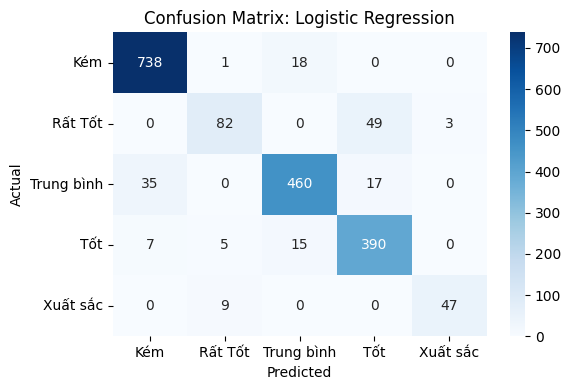

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫≠p h·ª£p c√°c m√¥ h√¨nh v√†o dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for name, model in models.items():
    print(f"\n================ {name} ================\n")
    
    # Hu·∫•n luy·ªán
    model.fit(X_train_scaled, y_train_encoded)
    
    # D·ª± ƒëo√°n
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"‚úÖ Accuracy: {acc:.4f}\n")

    # Classification report
    print("üìä Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(6, 4))  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# Dataframe_ql confusion matrix

In [161]:
dataframe_ql

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi      Book Huy ƒë·ªông  \
0           25     CQL DVKH          15.83        N·ªØ    42  68,382,348,762.00   
1           22     CQL DVKH          13.33        N·ªØ    37  68,382,348,762.00   
2           27     CQL DVKH          16.17       Nam    48  48,507,770,815.00   
3           63     CQL DVKH          13.67        N·ªØ    39 190,979,972,081.00   
4           31     CQL DVKH          15.58        N·ªØ    43  56,215,318,133.00   
...        ...          ...            ...       ...   ...                ...   
14040       28     CQL QHKH           0.00       Nam    41               0.00   
14043      126     CQL QHKH           0.00       Nam    34               0.00   
14045       49     CQL QHKH           0.00       Nam    35               0.00   
14068       57     CQL QHKH           0.00       Nam    40               0.00   
14069        7     CQL QHKH           0.00       Nam    38               0.00   

        Book Cho vay      Net Huy ƒë·ªông     Net Cho vay  \
0     853,800,000.00  3,127,777,986.33 -385,670,000.00   
1     853,800,000.00  3,127,777,986.33 -385,670,000.00   
2       3,221,763.90 39,407,406,889.80      220,561.35   
3      58,500,584.40    624,766,772.27  244,910,229.69   
4     390,000,000.00  1,898,063,539.63   46,200,000.00   
...              ...               ...             ...   
14040           0.00      2,258,281.06            0.00   
14043           0.00              0.00            0.00   
14045           0.00    203,431,753.03            0.00   
14068           0.00              0.00            0.00   
14069           0.00              0.00            0.00   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
0                            56.20                          55.08   
1                            56.20                          55.08   
2                            39.87                          39.07   
3                           156.97                         153.83   
4                            46.20                          45.28   
...                            ...                            ...   
14040                         0.00                           0.00   
14043                         0.00                           0.00   
14045                         0.00                           0.00   
14068                         0.00                           0.00   
14069                         0.00                           0.00   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
0                             1.12                    1.75         2.57   
1                             1.12                    1.75         2.57   
2                             0.80                    0.01        31.77   
3                             3.14                    0.12         0.51   
4                             0.92                    0.80         1.56   
...                            ...                     ...          ...   
14040                         0.00                    0.00         0.00   
14043                         0.00                    0.00         0.00   
14045                         0.00                    0.00         0.42   
14068                         0.00                    0.00         0.00   
14069                         0.00                    0.00         0.00   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
0            -0.79     20              29.04              0.64   
1            -0.79    548              57.95              1.77   
2             0.00     55              39.88             31.77   
3             0.50    105             157.09              1.02   
4             0.09     86              47.00              1.65   
...            ...    ...                ...               ...   
14040         0.00      1               0.00              0.00   
14043    

In [162]:
dataframe_ql = dataframe_ql.dropna(subset=['Thu nh·∫≠p Gross'])
dataframe_ql

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi      Book Huy ƒë·ªông  \
0           25     CQL DVKH          15.83        N·ªØ    42  68,382,348,762.00   
1           22     CQL DVKH          13.33        N·ªØ    37  68,382,348,762.00   
2           27     CQL DVKH          16.17       Nam    48  48,507,770,815.00   
3           63     CQL DVKH          13.67        N·ªØ    39 190,979,972,081.00   
4           31     CQL DVKH          15.58        N·ªØ    43  56,215,318,133.00   
...        ...          ...            ...       ...   ...                ...   
13985       63     CQL QHKH           1.25       Nam    33           4,827.00   
14019       56          KSV           0.17        N·ªØ    41   4,454,019,669.00   
14040       28     CQL QHKH           0.00       Nam    41               0.00   
14043      126     CQL QHKH           0.00       Nam    34               0.00   
14045       49     CQL QHKH           0.00       Nam    35               0.00   

           Book Cho vay      Net Huy ƒë·ªông     Net Cho vay  \
0        853,800,000.00  3,127,777,986.33 -385,670,000.00   
1        853,800,000.00  3,127,777,986.33 -385,670,000.00   
2          3,221,763.90 39,407,406,889.80      220,561.35   
3         58,500,584.40    624,766,772.27  244,910,229.69   
4        390,000,000.00  1,898,063,539.63   46,200,000.00   
...                 ...               ...             ...   
13985 98,400,000,000.00      2,472,342.97            0.00   
14019              0.00    142,044,208.29            0.00   
14040              0.00      2,258,281.06            0.00   
14043              0.00              0.00            0.00   
14045              0.00    203,431,753.03            0.00   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
0                            56.20                          55.08   
1                            56.20                          55.08   
2                            39.87                          39.07   
3                           156.97                         153.83   
4                            46.20                          45.28   
...                            ...                            ...   
13985                         0.00                           0.00   
14019                         3.99                           3.91   
14040                         0.00                           0.00   
14043                         0.00                           0.00   
14045                         0.00                           0.00   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
0                             1.12                    1.75         2.57   
1                             1.12                    1.75         2.57   
2                             0.80                    0.01        31.77   
3                             3.14                    0.12         0.51   
4                             0.92                    0.80         1.56   
...                            ...                     ...          ...   
13985                         0.00                  205.00         0.01   
14019                         0.08                    0.00         0.08   
14040                         0.00                    0.00         0.00   
14043                         0.00                    0.00         0.00   
14045                         0.00                    0.00         0.42   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
0            -0.79     20              29.04              0.64   
1            -0.79    548              57.95              1.77   
2             0.00     55              39.88             31.77   
3             0.50    105             157.09              1.02   
4             0.09     86              47.00              1.65   
...            ...    ...                ...               ...   
13985         0.00      3            

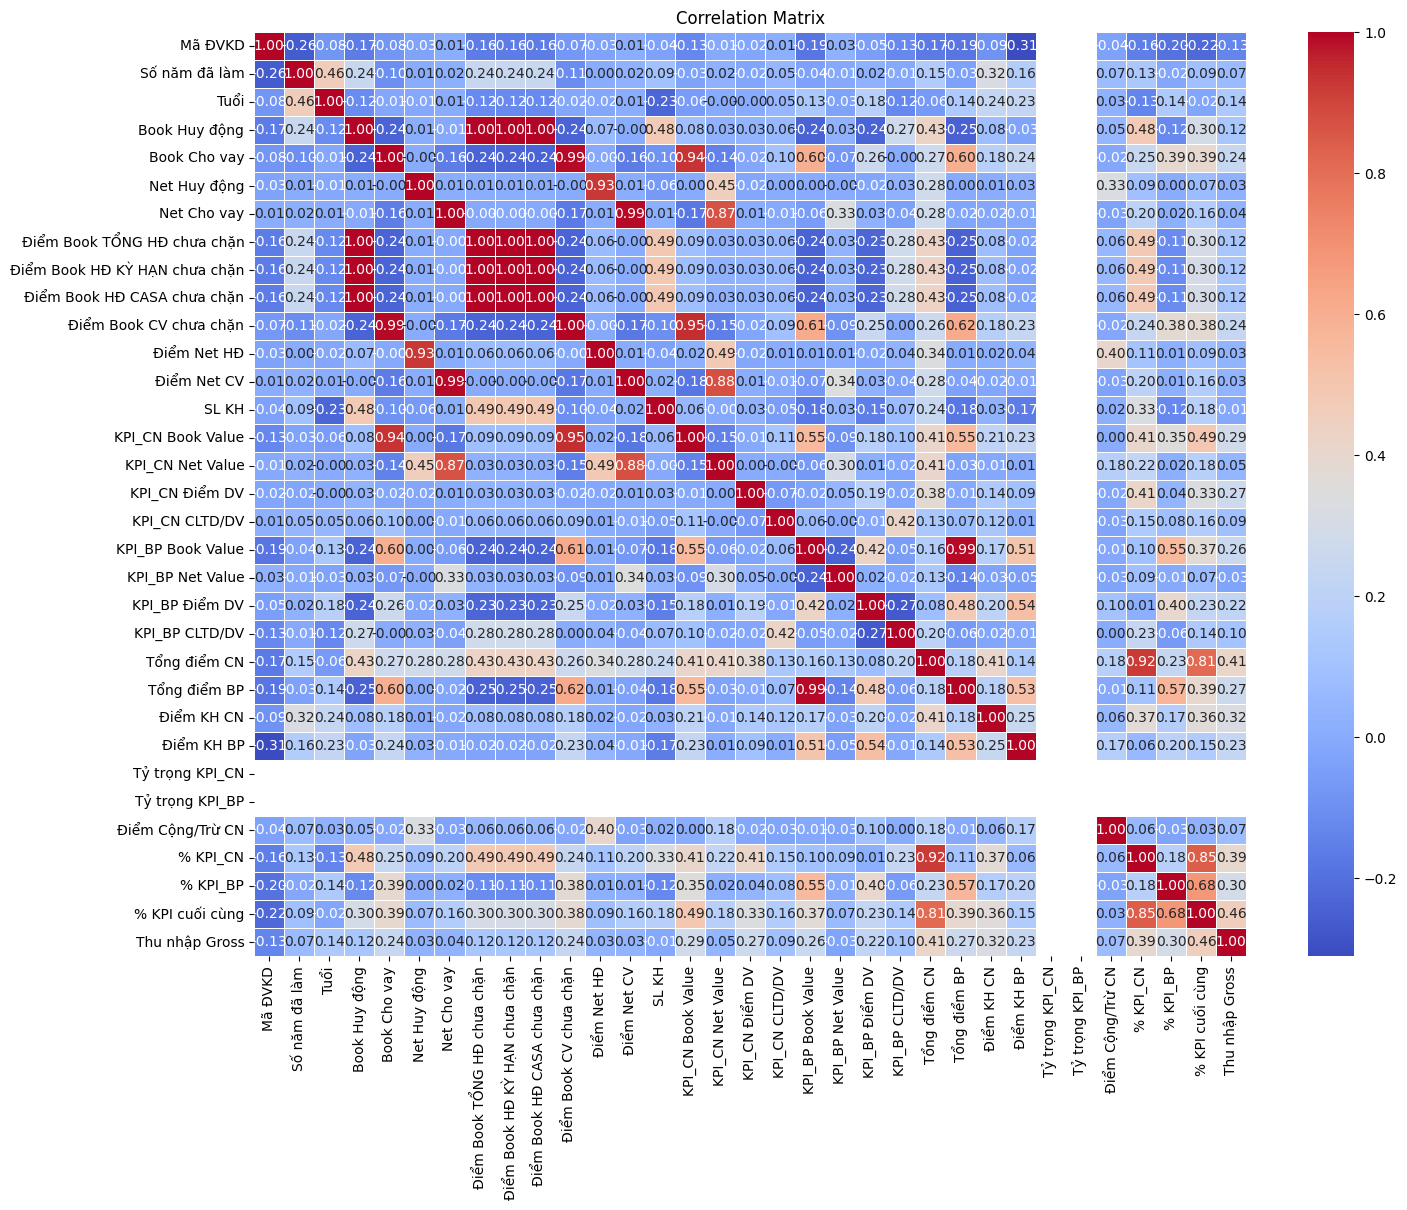

In [163]:
# Ma tr·∫≠n t∆∞∆°ng quan ban ƒë·∫ßu
df_ql = dataframe_ql.select_dtypes(include=[np.number])
corr_matrix = df_ql.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [164]:
# X√≥a c√°c bi·∫øn Kh√¥ng li√™n quan
df_ql.drop(columns=['ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',              
                 'M√£ ƒêVKD',
                 'S·ªë nƒÉm ƒë√£ l√†m',
                 'Tu·ªïi',
                 'KPI_CN CLTD/DV',
                 'Thu nh·∫≠p Gross',
                 'ƒêi·ªÉm Net Hƒê',
                 'ƒêi·ªÉm Net CV',
                 #'KPI_CN Book Value',
                 'KPI_CN Net Value',
                 #'% KPI_CN',
                 #'% KPI_BP',
                 'T·ª∑ tr·ªçng KPI_CN',
                 'T·ª∑ tr·ªçng KPI_BP',
                 #'KPI_BP Book Value',
                 'KPI_BP Net Value',
                 'Net Huy ƒë·ªông'
                 
                ], inplace=True)



# X√≥a bi·∫øn thi·∫øu √Ω nghƒ©a - kho·∫£ng 90% gi√° tr·ªã = 0
df_ql.drop(columns=['ƒêi·ªÉm C·ªông/Tr·ª´ CN'], inplace=True)

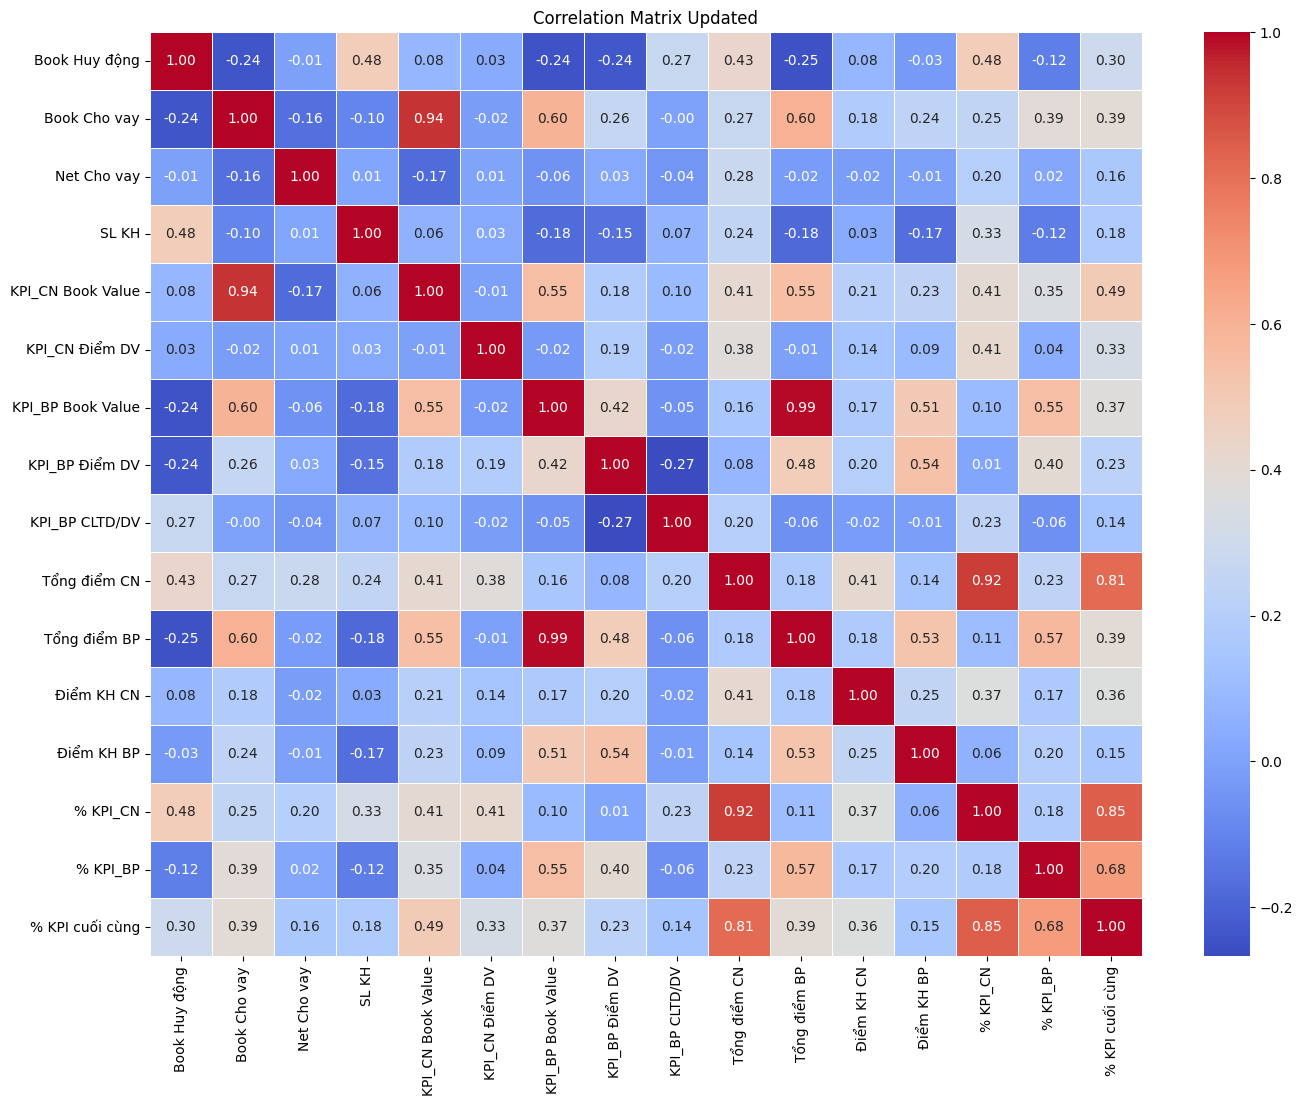

In [165]:
# Ma tr·∫≠n t∆∞∆°ng quan 2
df_numeric_3 = df_ql.select_dtypes(include=[np.number])
corr_matrix_3 = df_numeric_3.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_3, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

# Run the model for dataframe_ql

In [166]:
# Bi·∫øn x l√† c√°c bi·∫øn ƒë·∫ßu v√†o, y l√† ƒë·∫ßu ra c·∫ßn d·ª± ƒëo√°n
x = df_ql.drop(['% KPI cu·ªëi c√πng'], axis=1)   
y = df_ql['% KPI cu·ªëi c√πng'] 

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42               
)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc t·∫≠p train/test
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1600, 15)
Test size: (400, 15)


In [167]:
# Sao ch√©p d·ªØ li·ªáu g·ªëc ƒë·ªÉ x·ª≠ l√Ω ri√™ng
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [168]:
# BI·∫æN ƒê·ªäNH L∆Ø·ª¢NG
numerical_cols = X_train_scaled.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Ki·ªÉm tra
display(X_train_scaled.head(5))
print("")
display(X_train_scaled.describe())

Book Huy ƒë·ªông  Book Cho vay  Net Cho vay  SL KH  KPI_CN Book Value  \
6299           0.50         -0.33        -0.03   0.42              -0.19   
1510           1.08          2.80        -0.48  -0.18               2.95   
5158          -0.68         -0.34        -0.02  -0.78              -0.56   
4538           1.01         -0.34        -0.01  -0.06              -0.04   
2915           1.40         -0.34        -0.01   0.97               0.01   

      KPI_CN ƒêi·ªÉm DV  KPI_BP Book Value  KPI_BP ƒêi·ªÉm DV  KPI_BP CLTD/DV  \
6299            1.18              -0.34           -0.23            0.78   
1510            0.26               0.72            5.32           -0.73   
5158            0.41              -0.36            1.15           -1.13   
4538           -0.41              -0.07           -0.27            1.76   
2915            0.21              -0.60           -0.68           -0.13   

      T·ªïng ƒëi·ªÉm CN  T·ªïng ƒëi·ªÉm BP  ƒêi·ªÉm KH CN  ƒêi·ªÉm KH BP  % KPI_CN  % KPI_BP  
6299          0.84         -0.34        0.77        0.25      0.66     -0.54  
1510          0.65          0.99        0.51       -0.09      0.61      1.35  
5158         -0.66         -0.32        0.51        0.33     -0.81     -0.53  
4538          0.80         -0.06        0.77        2.36      0.62     -0.73  
2915          0.66         -0.64       -0.13       -1.69      1.05      0.14

Book Huy ƒë·ªông  Book Cho vay  Net Cho vay    SL KH  KPI_CN Book Value  \
count       1,600.00      1,600.00     1,600.00 1,600.00           1,600.00   
mean            0.00          0.00         0.00    -0.00               0.00   
std             1.00          1.00         1.00     1.00               1.00   
min            -0.94         -0.34       -13.89    -0.83              -0.64   
25%            -0.84         -0.34        -0.01    -0.68              -0.50   
50%            -0.30         -0.34        -0.01    -0.34              -0.26   
75%             0.60         -0.28        -0.00     0.36               0.01   
max             5.27         13.68        12.49     7.55              14.60   

       KPI_CN ƒêi·ªÉm DV  KPI_BP Book Value  KPI_BP ƒêi·ªÉm DV  KPI_BP CLTD/DV  \
count        1,600.00           1,600.00        1,600.00        1,600.00   
mean            -0.00              -0.00            0.00           -0.00   
std              1.00               1.00            1.00            1.00   
min             -0.66              -0.61           -0.91           -7.09   
25%             -0.58              -0.48           -0.68           -0.52   
50%             -0.42              -0.36           -0.38            0.06   
75%              0.16              -0.04            0.31            0.56   
max              8.28               6.82            6.08            3.85   

       T·ªïng ƒëi·ªÉm CN  T·ªïng ƒëi·ªÉm BP  ƒêi·ªÉm KH CN  ƒêi·ªÉm KH BP  % KPI_CN  % KPI_BP  
count      1,600.00      1,600.00    1,600.00    1,600.00  1,600.00  1,600.00  
mean          -0.00          0.00       -0.00       -0.00     -0.00      0.00  
std            1.00          1.00        1.00        1.00      1.00      1.00  
min           -1.49         -0.67       -3.39       -1.69     -1.65     -2.62  
25%           -0.78         -0.50       -0.13       -0.74     -0.83     -0.75  
50%            0.09         -0.36        0.51       -0.18      0.19     -0.22  
75%            0.59         -0.02        0.52        0.54      0.67      1.35  
max           14.81          6.77        0.77        4.22      3.71      1.35

# Run the model- Classification

In [169]:
# B∆∞·ªõc 1: G√°n nh√£n ph√¢n lo·∫°i
def classify_kpi(kpi):
    if kpi < 0.5:
        return 'K√©m'
    elif 0.5 <= kpi < 0.8:
        return 'Trung b√¨nh'
    elif 0.8 <= kpi < 1.0:
        return 'T·ªët'
    elif 1.0 <= kpi <= 1.2:
        return 'R·∫•t T·ªët'
    else:
        return 'Xu·∫•t s·∫Øc'

# G√°n nh√£n cho t·∫≠p train/test
y_train_label = y_train.apply(classify_kpi)
y_test_label = y_test.apply(classify_kpi)

# Encode nh√£n th√†nh s·ªë (ƒë·ªÉ train ƒë∆∞·ª£c m√¥ h√¨nh)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_label)
y_test_encoded = label_encoder.transform(y_test_label)

# Ki·ªÉm tra nh√£n
print("Classes:", label_encoder.classes_)
print("Encoded train labels:", np.unique(y_train_encoded, return_counts=True))


Classes: ['K√©m' 'R·∫•t T·ªët' 'Trung b√¨nh' 'T·ªët' 'Xu·∫•t s·∫Øc']
Encoded train labels: (array([0, 1, 2, 3, 4]), array([363, 277, 570, 333,  57], dtype=int64))



================ Decision Tree ================

‚úÖ Accuracy: 0.9150

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.89      0.99      0.94        77
     R·∫•t T·ªët       0.89      0.97      0.93        75
  Trung b√¨nh       0.95      0.90      0.92       150
         T·ªët       0.89      0.83      0.86        86
    Xu·∫•t s·∫Øc       1.00      0.92      0.96        12

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.91       400



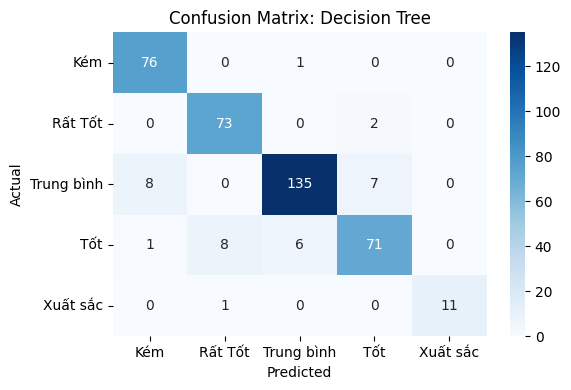


================ Random Forest ================

‚úÖ Accuracy: 0.9300

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.96      0.99      0.97        77
     R·∫•t T·ªët       0.92      0.88      0.90        75
  Trung b√¨nh       0.95      0.97      0.96       150
         T·ªët       0.88      0.87      0.88        86
    Xu·∫•t s·∫Øc       0.91      0.83      0.87        12

    accuracy                           0.93       400
   macro avg       0.92      0.91      0.92       400
weighted avg       0.93      0.93      0.93       400



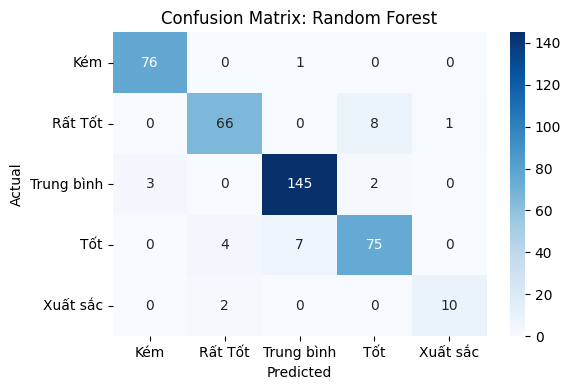


================ KNN ================

‚úÖ Accuracy: 0.8525

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.89      0.96      0.93        77
     R·∫•t T·ªët       0.85      0.83      0.84        75
  Trung b√¨nh       0.89      0.85      0.87       150
         T·ªët       0.75      0.84      0.79        86
    Xu·∫•t s·∫Øc       1.00      0.50      0.67        12

    accuracy                           0.85       400
   macro avg       0.88      0.79      0.82       400
weighted avg       0.86      0.85      0.85       400



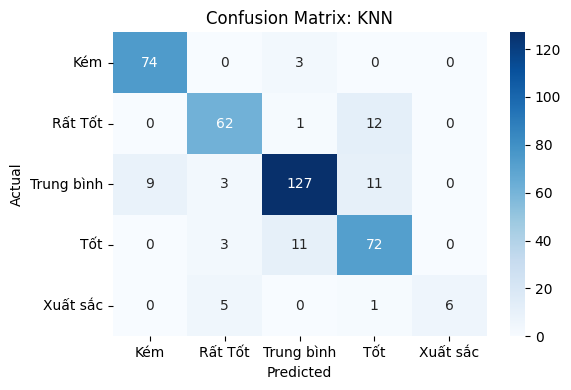


================ SVM ================

‚úÖ Accuracy: 0.9200

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.97      0.97      0.97        77
     R·∫•t T·ªët       0.91      0.83      0.87        75
  Trung b√¨nh       0.95      0.95      0.95       150
         T·ªët       0.82      0.93      0.87        86
    Xu·∫•t s·∫Øc       1.00      0.67      0.80        12

    accuracy                           0.92       400
   macro avg       0.93      0.87      0.89       400
weighted avg       0.92      0.92      0.92       400



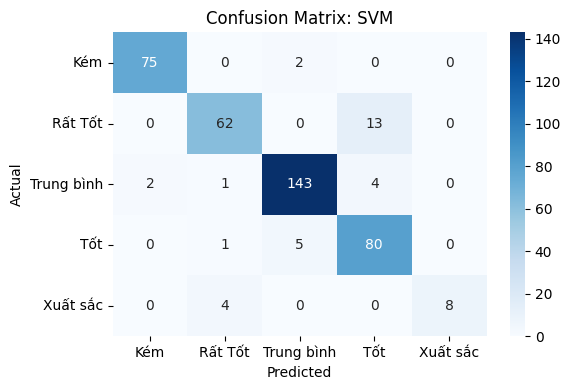


================ Gradient Boosting ================

‚úÖ Accuracy: 0.9625

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.97      0.97      0.97        77
     R·∫•t T·ªët       0.97      0.96      0.97        75
  Trung b√¨nh       0.97      0.96      0.97       150
         T·ªët       0.92      0.95      0.94        86
    Xu·∫•t s·∫Øc       1.00      1.00      1.00        12

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.96      0.96      0.96       400



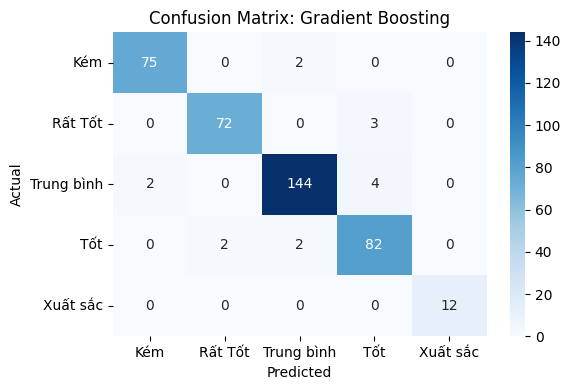


================ Logistic Regression ================

‚úÖ Accuracy: 0.9375

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.99      0.97      0.98        77
     R·∫•t T·ªët       0.93      0.89      0.91        75
  Trung b√¨nh       0.94      0.99      0.96       150
         T·ªët       0.93      0.91      0.92        86
    Xu·∫•t s·∫Øc       0.70      0.58      0.64        12

    accuracy                           0.94       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.94      0.94      0.94       400



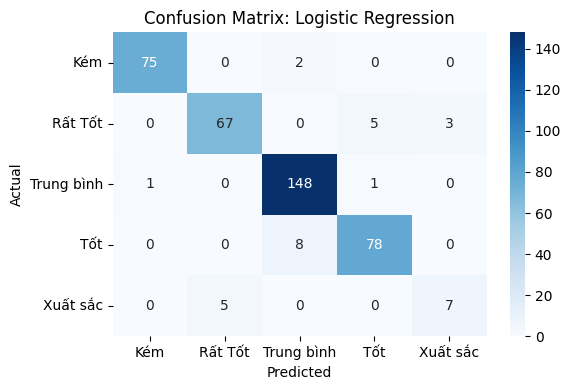

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫≠p h·ª£p c√°c m√¥ h√¨nh v√†o dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for name, model in models.items():
    print(f"\n================ {name} ================\n")
    
    # Hu·∫•n luy·ªán
    model.fit(X_train_scaled, y_train_encoded)
    
    # D·ª± ƒëo√°n
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"‚úÖ Accuracy: {acc:.4f}\n")

    # Classification report
    print("üìä Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# Feature Importance

C:\Users\ta an\AppData\Local\Temp\ipykernel_15228\2237807147.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ƒê·ªô quan tr·ªçng', y='ƒê·∫∑c tr∆∞ng',


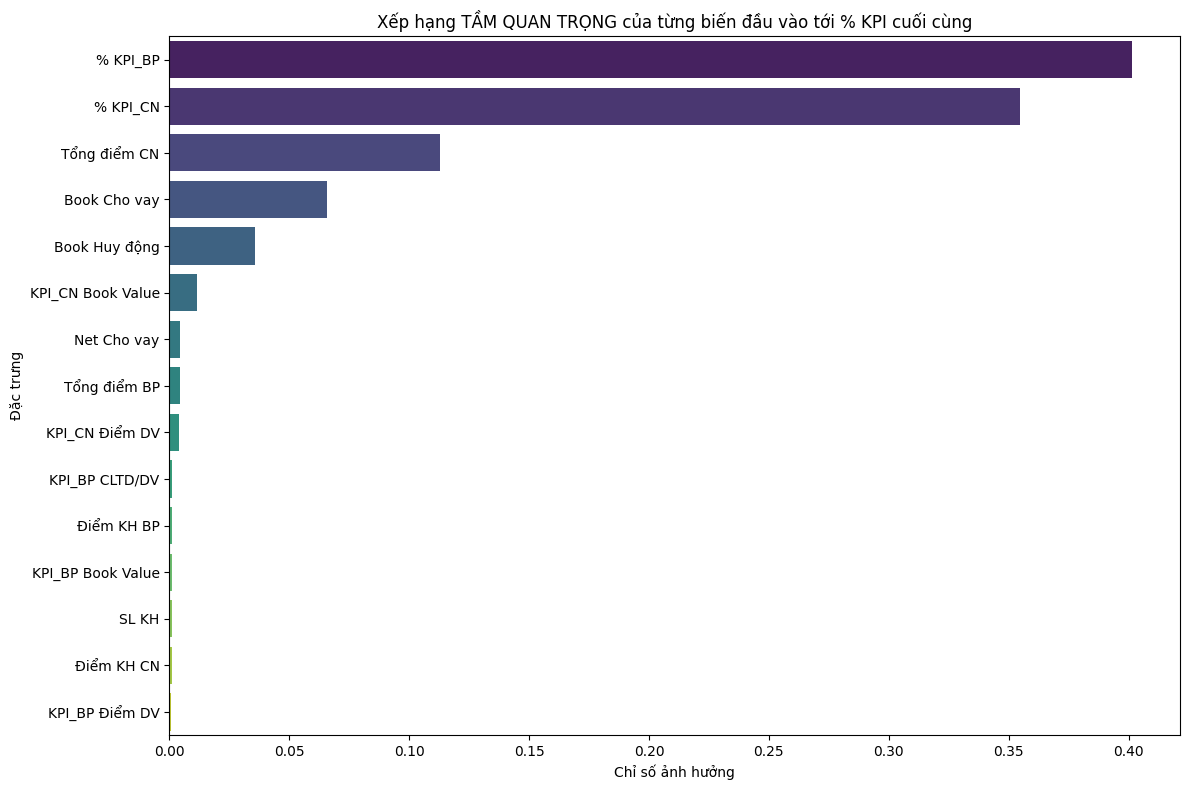

In [171]:
# Hu·∫•n luy·ªán l·∫°i Gradient Boosting ƒë·ªÉ tr√≠ch xu·∫•t feature importance
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train_encoded)

# Tr√≠ch xu·∫•t feature importances
importances = gb_model.feature_importances_
feature_names = X_train_scaled.columns

# T·∫°o DataFrame, s·∫Øp x·∫øp gi·∫£m d·∫ßn theo Importance
feature_importances = pd.DataFrame({
    'ƒê·∫∑c tr∆∞ng': feature_names,
    'ƒê·ªô quan tr·ªçng': importances
}).sort_values(by='ƒê·ªô quan tr·ªçng', ascending=False)

# V·∫Ω bi·ªÉu ƒë·ªì top 20 bi·∫øn quan tr·ªçng
plt.figure(figsize=(12, 8))
sns.barplot(x='ƒê·ªô quan tr·ªçng', y='ƒê·∫∑c tr∆∞ng',
            data=feature_importances.head(20),
            palette='viridis')
plt.title('X·∫øp h·∫°ng T·∫¶M QUAN TR·ªåNG c·ªßa t·ª´ng bi·∫øn ƒë·∫ßu v√†o t·ªõi % KPI cu·ªëi c√πng')
plt.xlabel('Ch·ªâ s·ªë ·∫£nh h∆∞·ªüng')
plt.ylabel('ƒê·∫∑c tr∆∞ng')
plt.tight_layout()
plt.show()


# ** Dataframe_ld COnfusion matrix

In [172]:
dataframe_ld

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi     Book Huy ƒë·ªông  \
397         98          PGƒê           0.67        N·ªØ    43  1,522,212,436.00   
398         97          PGƒê           1.92        N·ªØ    40  2,803,701,204.00   
399         27          PGƒê           0.67       Nam    42         32,265.00   
400         34          PGƒê          12.83       Nam    38  7,653,759,338.00   
401         34          PGƒê           1.08       Nam    42  1,598,626,950.00   
...        ...          ...            ...       ...   ...               ...   
13964      137          PGƒê           0.17       Nam    40    670,072,392.00   
14023       56          PGƒê           6.83       Nam    49              0.00   
14028      115          PGƒê           7.33       Nam    39              0.00   
14036       51          PGƒê           0.00        N·ªØ    35              0.00   
14049      109          PGƒê           0.00        N·ªØ    41 13,717,506,965.00   

          Book Cho vay     Net Huy ƒë·ªông    Net Cho vay  \
397               0.00 8,271,180,493.67           0.00   
398               0.00            15.80           0.00   
399               0.00     6,324,686.13           0.00   
400     365,589,143.10    20,683,013.57 -28,859,672.29   
401      54,482,248.20  -346,252,295.53    -954,877.50   
...                ...              ...            ...   
13964 9,501,387,090.90   610,118,396.52 127,271,868.57   
14023             0.00             0.00           0.00   
14028             0.00             0.00           0.00   
14036             0.00             0.00           0.00   
14049     2,671,321.20 1,354,331,048.06  -2,116,117.60   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
397                           1.25                           1.23   
398                           2.30                           2.25   
399                           0.00                           0.00   
400                           6.29                           6.16   
401                           1.31                           1.28   
...                            ...                            ...   
13964                         1.17                           1.14   
14023                         0.00                           0.00   
14028                         0.00                           0.00   
14036                         0.00                           0.00   
14049                        11.65                          11.42   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
397                           0.02                    0.00         6.61   
398                           0.05                    0.00         0.00   
399                           0.00                    0.00         0.01   
400                           0.13                    0.75         0.02   
401                           0.03                    0.11        -0.28   
...                            ...                     ...          ...   
13964                         0.02                   19.79         0.40   
14023                         0.00                    0.00         0.00   
14028                         0.00                    0.00         0.00   
14036                         0.00                    0.00         0.00   
14049                         0.23                    0.01         1.33   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
397           0.00      4               1.25              6.61   
398           0.00     26               2.30              0.00   
399           0.00      1               0.00              0.01   
400          -0.06     31               7.04             -0.04   
401          -0.00      3               1.42             -0.29   
...            ...    ...                ...               ...   
13964         0.27    101              20.96              0.68   
14023      

In [173]:
dataframe_ql = dataframe_ql.dropna(subset=['Thu nh·∫≠p Gross'])
dataframe_ql

M√£ ƒêVKD M√£ ch·ª©c danh  S·ªë nƒÉm ƒë√£ l√†m Gi·ªõi t√≠nh  Tu·ªïi      Book Huy ƒë·ªông  \
0           25     CQL DVKH          15.83        N·ªØ    42  68,382,348,762.00   
1           22     CQL DVKH          13.33        N·ªØ    37  68,382,348,762.00   
2           27     CQL DVKH          16.17       Nam    48  48,507,770,815.00   
3           63     CQL DVKH          13.67        N·ªØ    39 190,979,972,081.00   
4           31     CQL DVKH          15.58        N·ªØ    43  56,215,318,133.00   
...        ...          ...            ...       ...   ...                ...   
13985       63     CQL QHKH           1.25       Nam    33           4,827.00   
14019       56          KSV           0.17        N·ªØ    41   4,454,019,669.00   
14040       28     CQL QHKH           0.00       Nam    41               0.00   
14043      126     CQL QHKH           0.00       Nam    34               0.00   
14045       49     CQL QHKH           0.00       Nam    35               0.00   

           Book Cho vay      Net Huy ƒë·ªông     Net Cho vay  \
0        853,800,000.00  3,127,777,986.33 -385,670,000.00   
1        853,800,000.00  3,127,777,986.33 -385,670,000.00   
2          3,221,763.90 39,407,406,889.80      220,561.35   
3         58,500,584.40    624,766,772.27  244,910,229.69   
4        390,000,000.00  1,898,063,539.63   46,200,000.00   
...                 ...               ...             ...   
13985 98,400,000,000.00      2,472,342.97            0.00   
14019              0.00    142,044,208.29            0.00   
14040              0.00      2,258,281.06            0.00   
14043              0.00              0.00            0.00   
14045              0.00    203,431,753.03            0.00   

       ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  \
0                            56.20                          55.08   
1                            56.20                          55.08   
2                            39.87                          39.07   
3                           156.97                         153.83   
4                            46.20                          45.28   
...                            ...                            ...   
13985                         0.00                           0.00   
14019                         3.99                           3.91   
14040                         0.00                           0.00   
14043                         0.00                           0.00   
14045                         0.00                           0.00   

       ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  \
0                             1.12                    1.75         2.57   
1                             1.12                    1.75         2.57   
2                             0.80                    0.01        31.77   
3                             3.14                    0.12         0.51   
4                             0.92                    0.80         1.56   
...                            ...                     ...          ...   
13985                         0.00                  205.00         0.01   
14019                         0.08                    0.00         0.08   
14040                         0.00                    0.00         0.00   
14043                         0.00                    0.00         0.00   
14045                         0.00                    0.00         0.42   

       ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  KPI_CN Net Value  \
0            -0.79     20              29.04              0.64   
1            -0.79    548              57.95              1.77   
2             0.00     55              39.88             31.77   
3             0.50    105             157.09              1.02   
4             0.09     86              47.00              1.65   
...            ...    ...                ...               ...   
13985         0.00      3            

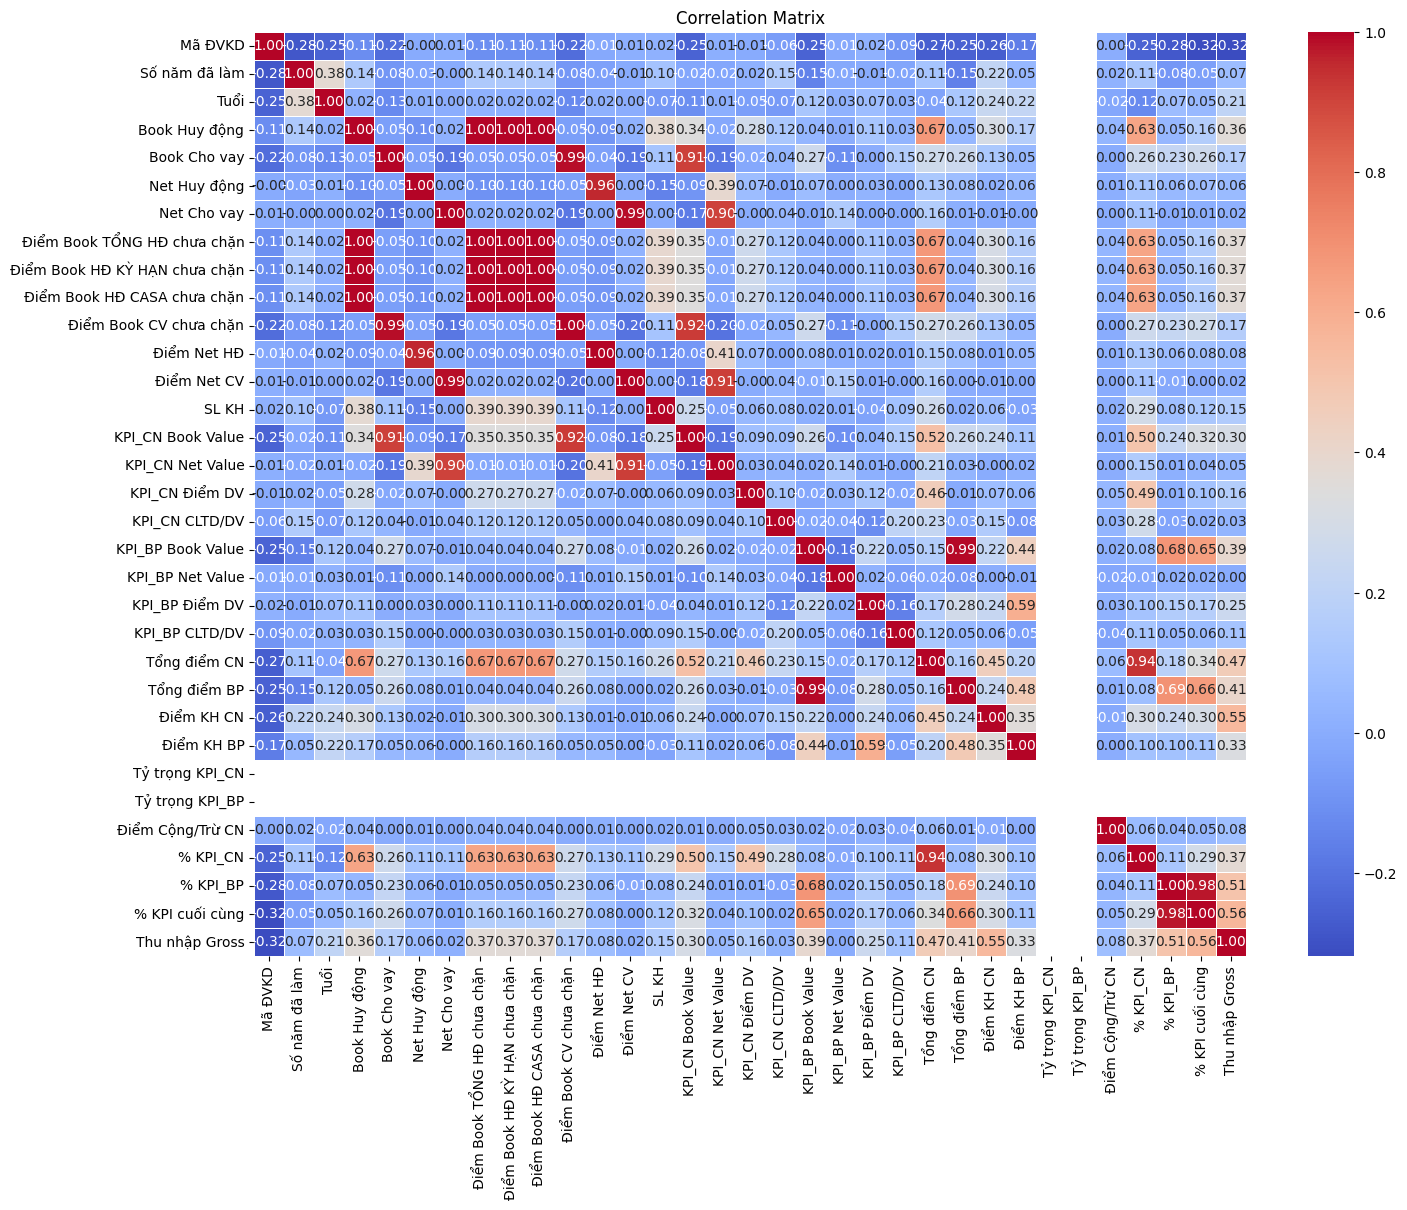

In [174]:
# Ma tr·∫≠n t∆∞∆°ng quan ban ƒë·∫ßu
df_ld = dataframe_ld.select_dtypes(include=[np.number])
corr_matrix = df_ld.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [176]:
# X√≥a c√°c bi·∫øn Kh√¥ng li√™n quan
df_ld.drop(columns=['ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',              
                 'M√£ ƒêVKD',
                 'S·ªë nƒÉm ƒë√£ l√†m',
                 'Tu·ªïi',
                 'KPI_CN CLTD/DV',
                 'Thu nh·∫≠p Gross',
                 'ƒêi·ªÉm Net Hƒê',
                 'ƒêi·ªÉm Net CV',
                 'KPI_CN Book Value',
                 'KPI_CN Net Value',
                 #'% KPI_CN',
                 #'% KPI_BP',
                 'T·ª∑ tr·ªçng KPI_CN',
                 'T·ª∑ tr·ªçng KPI_BP',
                 #'KPI_BP Book Value',
                 'KPI_BP Net Value',
                 'Net Huy ƒë·ªông',
                 'Net Cho vay'
                 
                ], inplace=True)



# X√≥a bi·∫øn thi·∫øu √Ω nghƒ©a - kho·∫£ng 90% gi√° tr·ªã = 0
df_ld.drop(columns=['ƒêi·ªÉm C·ªông/Tr·ª´ CN'], inplace=True)

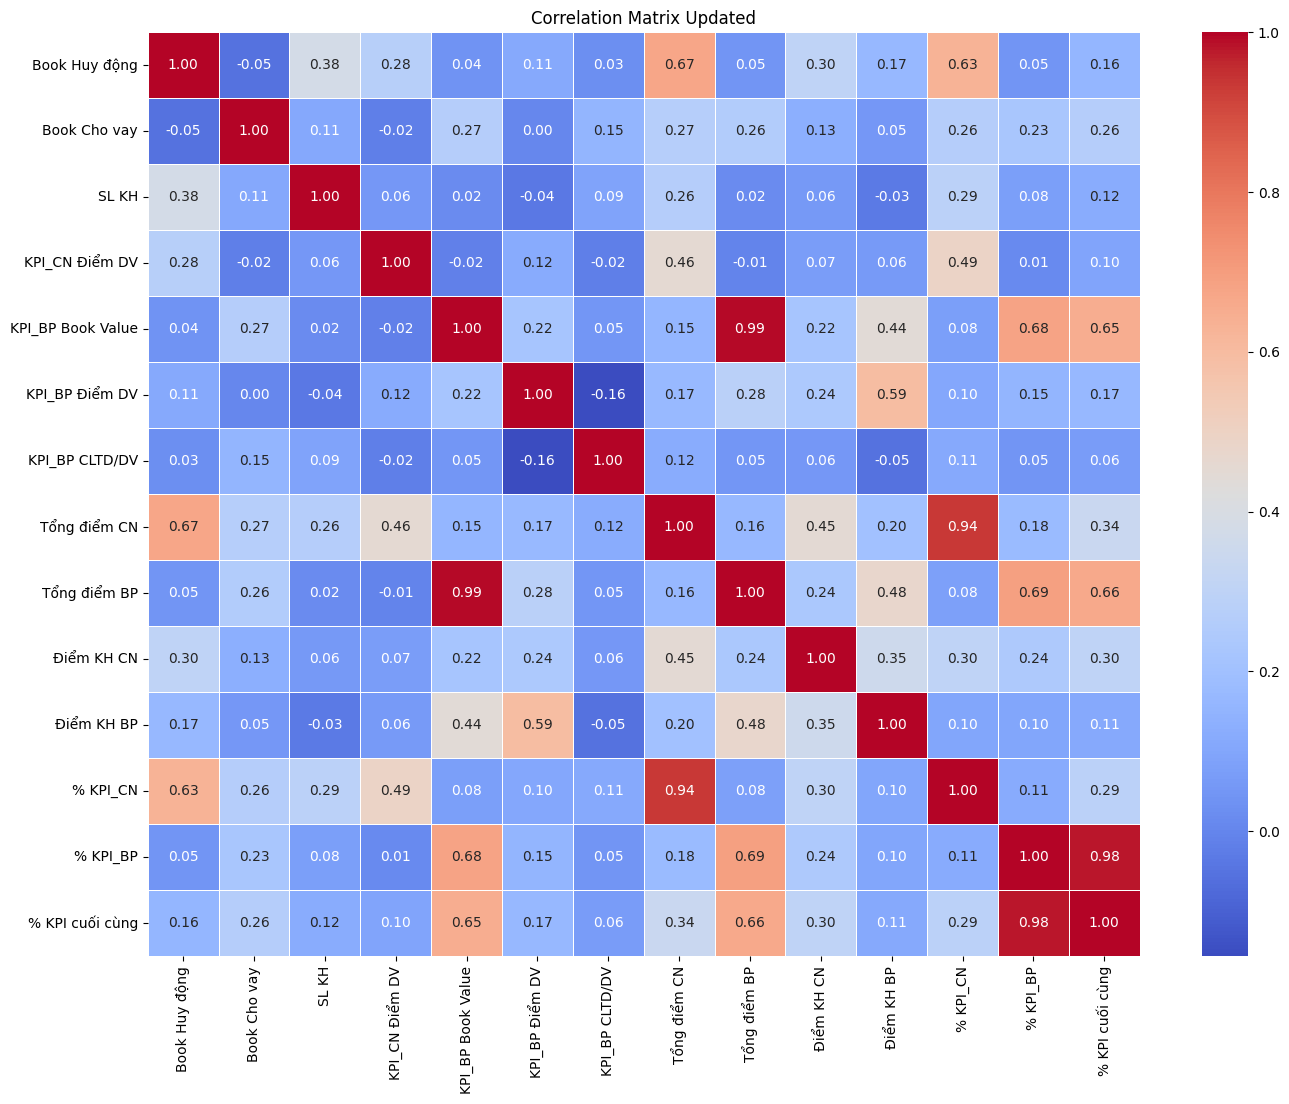

In [177]:
# Ma tr·∫≠n t∆∞∆°ng quan 2
df_numeric_4 = df_ld.select_dtypes(include=[np.number])
corr_matrix_4 = df_numeric_4.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_4, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

# Run the model-Classification

In [178]:
# Bi·∫øn x l√† c√°c bi·∫øn ƒë·∫ßu v√†o, y l√† ƒë·∫ßu ra c·∫ßn d·ª± ƒëo√°n
x = df_ld.drop(['% KPI cu·ªëi c√πng'], axis=1)   
y = df_ld['% KPI cu·ªëi c√πng'] 

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42               
)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc t·∫≠p train/test
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (978, 13)
Test size: (245, 13)


In [179]:
# Sao ch√©p d·ªØ li·ªáu g·ªëc ƒë·ªÉ x·ª≠ l√Ω ri√™ng
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [180]:
# BI·∫æN ƒê·ªäNH L∆Ø·ª¢NG
numerical_cols = X_train_scaled.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Ki·ªÉm tra
display(X_train_scaled.head(5))
print("")
display(X_train_scaled.describe())

Book Huy ƒë·ªông  Book Cho vay  SL KH  KPI_CN ƒêi·ªÉm DV  KPI_BP Book Value  \
6698            0.14         -0.26  -0.19           -0.41              -0.48   
11011          -0.03         -0.25   0.00           -0.39              -0.13   
411            -0.55         -0.27  -0.25           -0.27              -0.54   
6027            2.19         -0.26  -0.24           -0.39              -0.29   
5132           -0.16         -0.27  -0.28            0.02              -0.60   

       KPI_BP ƒêi·ªÉm DV  KPI_BP CLTD/DV  T·ªïng ƒëi·ªÉm CN  T·ªïng ƒëi·ªÉm BP  ƒêi·ªÉm KH CN  \
6698            -0.27            0.20         -0.13         -0.50       -1.41   
11011            0.25           -0.32         -0.03         -0.12        0.03   
411             -0.25           -0.11         -0.63         -0.54       -0.07   
6027             2.72           -0.99          0.83         -0.13        0.03   
5132            -0.82           -0.19         -0.10         -0.65        0.03   

       ƒêi·ªÉm KH BP  % KPI_CN  % KPI_BP  
6698        -0.72      1.08     -0.32  
11011       -0.53      0.08      1.01  
411         -0.78     -0.65     -0.44  
6027         0.84      1.13     -0.47  
5132        -1.05     -0.02     -0.68

Book Huy ƒë·ªông  Book Cho vay  SL KH  KPI_CN ƒêi·ªÉm DV  KPI_BP Book Value  \
count         978.00        978.00 978.00          978.00             978.00   
mean           -0.00          0.00   0.00            0.00               0.00   
std             1.00          1.00   1.00            1.00               1.00   
min            -0.65         -0.27  -0.31           -0.41              -0.78   
25%            -0.64         -0.27  -0.30           -0.41              -0.53   
50%            -0.34         -0.27  -0.25           -0.37              -0.32   
75%             0.24         -0.26  -0.14           -0.06               0.13   
max             8.82          8.61  12.16           12.75               7.85   

       KPI_BP ƒêi·ªÉm DV  KPI_BP CLTD/DV  T·ªïng ƒëi·ªÉm CN  T·ªïng ƒëi·ªÉm BP  ƒêi·ªÉm KH CN  \
count          978.00          978.00        978.00        978.00      978.00   
mean             0.00           -0.00          0.00         -0.00        0.00   
std              1.00            1.00          1.00          1.00        1.00   
min             -1.22           -8.34         -1.23         -0.86       -2.85   
25%             -0.68           -0.44         -0.88         -0.56       -0.07   
50%             -0.28            0.02         -0.21         -0.31        0.03   
75%              0.39            0.53          0.71          0.13        0.03   
max              5.48            3.32          7.64          7.92        1.28   

       ƒêi·ªÉm KH BP  % KPI_CN  % KPI_BP  
count      978.00    978.00    978.00  
mean         0.00      0.00     -0.00  
std          1.00      1.00      1.00  
min         -1.99     -1.34     -1.99  
25%         -0.72     -0.95     -0.78  
50%         -0.29     -0.16     -0.41  
75%          0.67      0.89      0.91  
max          4.86      3.90      2.42

In [181]:
# B∆∞·ªõc 1: G√°n nh√£n ph√¢n lo·∫°i
def classify_kpi(kpi):
    if kpi < 0.5:
        return 'K√©m'
    elif 0.5 <= kpi < 0.8:
        return 'Trung b√¨nh'
    elif 0.8 <= kpi < 1.0:
        return 'T·ªët'
    elif 1.0 <= kpi <= 1.2:
        return 'R·∫•t T·ªët'
    else:
        return 'Xu·∫•t s·∫Øc'

# G√°n nh√£n cho t·∫≠p train/test
y_train_label = y_train.apply(classify_kpi)
y_test_label = y_test.apply(classify_kpi)

# Encode nh√£n th√†nh s·ªë (ƒë·ªÉ train ƒë∆∞·ª£c m√¥ h√¨nh)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_label)
y_test_encoded = label_encoder.transform(y_test_label)

# Ki·ªÉm tra nh√£n
print("Classes:", label_encoder.classes_)
print("Encoded train labels:", np.unique(y_train_encoded, return_counts=True))


Classes: ['K√©m' 'R·∫•t T·ªët' 'Trung b√¨nh' 'T·ªët' 'Xu·∫•t s·∫Øc']
Encoded train labels: (array([0, 1, 2, 3, 4]), array([109,  80, 346, 120, 323], dtype=int64))



================ Decision Tree ================

‚úÖ Accuracy: 0.9061

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.96      0.86      0.91        28
     R·∫•t T·ªët       0.70      0.76      0.73        21
  Trung b√¨nh       0.89      0.97      0.93        75
         T·ªët       0.88      0.76      0.81        29
    Xu·∫•t s·∫Øc       0.97      0.95      0.96        92

    accuracy                           0.91       245
   macro avg       0.88      0.86      0.87       245
weighted avg       0.91      0.91      0.91       245



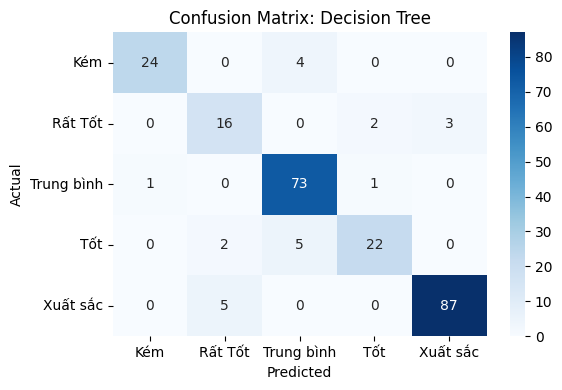


================ Random Forest ================

‚úÖ Accuracy: 0.9306

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.96      0.96      0.96        28
     R·∫•t T·ªët       0.79      0.71      0.75        21
  Trung b√¨nh       0.93      0.99      0.95        75
         T·ªët       0.96      0.83      0.89        29
    Xu·∫•t s·∫Øc       0.95      0.96      0.95        92

    accuracy                           0.93       245
   macro avg       0.92      0.89      0.90       245
weighted avg       0.93      0.93      0.93       245



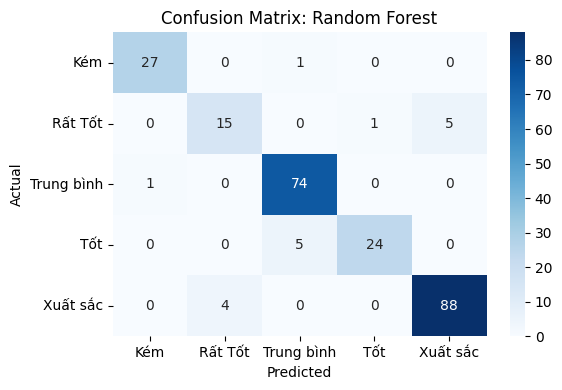


================ KNN ================

‚úÖ Accuracy: 0.7796

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.68      0.61      0.64        28
     R·∫•t T·ªët       0.52      0.52      0.52        21
  Trung b√¨nh       0.73      0.85      0.79        75
         T·ªët       0.71      0.52      0.60        29
    Xu·∫•t s·∫Øc       0.93      0.91      0.92        92

    accuracy                           0.78       245
   macro avg       0.72      0.68      0.69       245
weighted avg       0.78      0.78      0.78       245



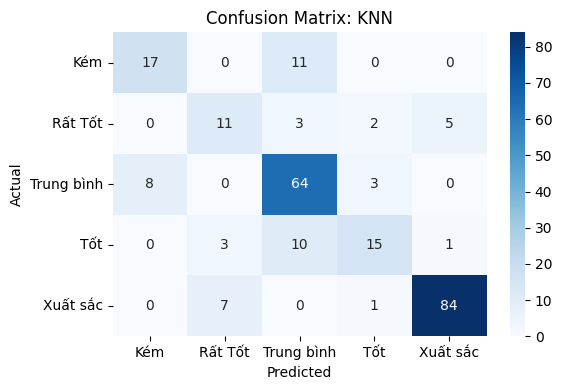


================ SVM ================

‚úÖ Accuracy: 0.8408

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.89      0.57      0.70        28
     R·∫•t T·ªët       0.64      0.33      0.44        21
  Trung b√¨nh       0.80      0.97      0.88        75
         T·ªët       0.79      0.76      0.77        29
    Xu·∫•t s·∫Øc       0.91      0.96      0.93        92

    accuracy                           0.84       245
   macro avg       0.80      0.72      0.74       245
weighted avg       0.84      0.84      0.83       245



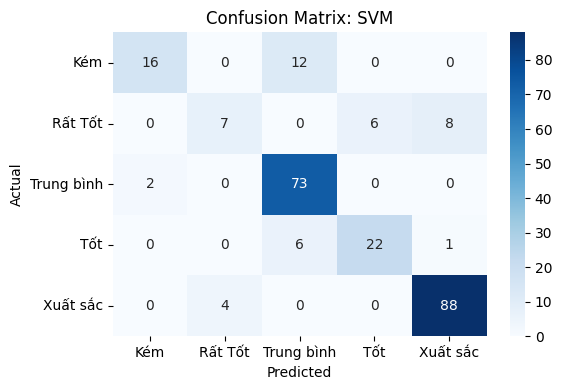


================ Gradient Boosting ================

‚úÖ Accuracy: 0.9143

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.93      0.93      0.93        28
     R·∫•t T·ªët       0.68      0.71      0.70        21
  Trung b√¨nh       0.92      0.97      0.95        75
         T·ªët       0.92      0.83      0.87        29
    Xu·∫•t s·∫Øc       0.96      0.93      0.95        92

    accuracy                           0.91       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.92      0.91      0.91       245



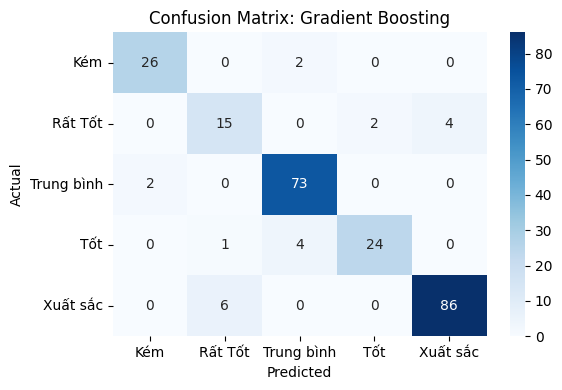


================ Logistic Regression ================

‚úÖ Accuracy: 0.8776

üìä Classification Report:
              precision    recall  f1-score   support

         K√©m       0.90      0.68      0.78        28
     R·∫•t T·ªët       1.00      0.57      0.73        21
  Trung b√¨nh       0.79      0.97      0.87        75
         T·ªët       0.86      0.66      0.75        29
    Xu·∫•t s·∫Øc       0.94      1.00      0.97        92

    accuracy                           0.88       245
   macro avg       0.90      0.78      0.82       245
weighted avg       0.89      0.88      0.87       245



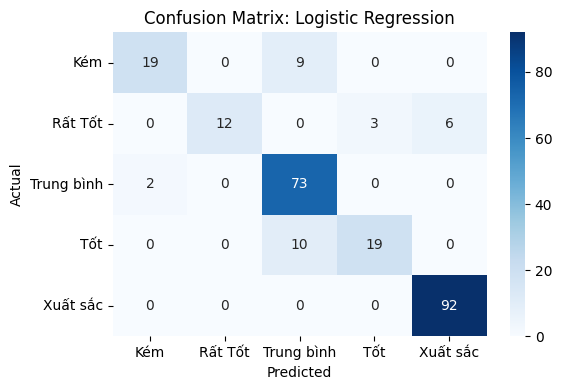

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫≠p h·ª£p c√°c m√¥ h√¨nh v√†o dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for name, model in models.items():
    print(f"\n================ {name} ================\n")
    
    # Hu·∫•n luy·ªán
    model.fit(X_train_scaled, y_train_encoded)
    
    # D·ª± ƒëo√°n
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"‚úÖ Accuracy: {acc:.4f}\n")

    # Classification report
    print("üìä Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
